In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

데이터 전처리

In [4]:
#비염, 아토피, 천식 데이터 불러오기
df1=pd.read_csv("/content/drive/MyDrive/EDA 2024-1/국민건강보험공단_환경성질환(비염) 의료이용정보_20221231.xlsx - 외래입원주부상병 (1).csv")
df2=pd.read_csv("/content/drive/MyDrive/EDA 2024-1/국민건강보험공단_환경성질환(아토피) 의료이용정보_20221231.xlsx - 외래입원주부상병.csv")
df3=pd.read_csv("/content/drive/MyDrive/EDA 2024-1/국민건강보험공단_환경성질환(천식) 의료이용정보_20221231.xlsx - 외래입원주부상병.csv")

In [5]:
#2013~2022년 인구수 데이터 불러오기
a1=pd.read_csv("/content/drive/MyDrive/EDA 2024-1/201301_201512_주민등록인구및세대현황_월간.csv",encoding='cp949',thousands=',')
a2=pd.read_csv("/content/drive/MyDrive/EDA 2024-1/201601_201812_주민등록인구및세대현황_월간.csv",encoding='cp949',thousands=',')
a3=pd.read_csv("/content/drive/MyDrive/EDA 2024-1/201901_202112_주민등록인구및세대현황_월간.csv",encoding='cp949',thousands=',')
a4=pd.read_csv("/content/drive/MyDrive/EDA 2024-1/202201_202212_주민등록인구및세대현황_월간.csv",encoding='cp949',thousands=',')

In [6]:
a1=a1[0:1]
a2=a2[0:1]
a3=a3[0:1]
a4=a4[0:1]

In [7]:
m=list(range(3,146,4))
w=list(range(4,146,4))
m1=list(range(3,50,4))
w1=list(range(4,50,4))

In [8]:
a1_m=a1.iloc[:,m]
a1_w=a1.iloc[:,w]
a2_m=a2.iloc[:,m]
a2_w=a2.iloc[:,w]
a3_m=a3.iloc[:,m]
a3_w=a3.iloc[:,w]
a4_m=a4.iloc[:,m1]
a4_w=a4.iloc[:,w1]

M=pd.concat([a1_m,a2_m,a3_m,a4_m],axis=1) #2013~2022년 월별 남성 인구수
W=pd.concat([a1_w,a2_w,a3_w,a4_w],axis=1) #2013~2022년 월별 여성 인구수
M.to_csv('/content/drive/MyDrive/EDA 2024-1/10년간 월별 남성 인구수.csv',encoding='cp949')
W.to_csv('/content/drive/MyDrive/EDA 2024-1/10년간 월별 여성 인구수.csv',encoding='cp949')

In [9]:
M_yearly=pd.DataFrame()

M_yearly['2013년 12월']=M.iloc[:,11]
M_yearly['2014년 12월']=M.iloc[:,23]
M_yearly['2015년 12월']=M.iloc[:,35]
M_yearly['2016년 12월']=M.iloc[:,47]
M_yearly['2017년 12월']=M.iloc[:,59]
M_yearly['2018년 12월']=M.iloc[:,71]
M_yearly['2019년 12월']=M.iloc[:,83]
M_yearly['2020년 12월']=M.iloc[:,95]
M_yearly['2021년 12월']=M.iloc[:,107]
M_yearly['2022년 12월']=M.iloc[:,119]

M_yearly #2013~2022년 연별 남성 인구수

,2013년 12월,2014년 12월,2015년 12월,2016년 12월,2017년 12월,2018년 12월,2019년 12월,2020년 12월,2021년 12월,2022년 12월
0,25588336,25669296,25758186,25827594,25855919,25866129,25864816,25841029,25746684,25636951


In [10]:
W_yearly=pd.DataFrame()

W_yearly['2013년 12월']=W.iloc[:,11]
W_yearly['2014년 12월']=W.iloc[:,23]
W_yearly['2015년 12월']=W.iloc[:,35]
W_yearly['2016년 12월']=W.iloc[:,47]
W_yearly['2017년 12월']=W.iloc[:,59]
W_yearly['2018년 12월']=W.iloc[:,71]
W_yearly['2019년 12월']=W.iloc[:,83]
W_yearly['2020년 12월']=W.iloc[:,95]
W_yearly['2021년 12월']=W.iloc[:,107]
W_yearly['2022년 12월']=W.iloc[:,119]

W_yearly #2013~2022년 연별 여성 인구수

,2013년 12월,2014년 12월,2015년 12월,2016년 12월,2017년 12월,2018년 12월,2019년 12월,2020년 12월,2021년 12월,2022년 12월
0,25553127,25658620,25771152,25868622,25922625,25959930,25985045,25987994,25892125,25802087


환경성질환 데이터 전처리(비염, 아토피, 천식)

In [11]:
df1=df1.iloc[:,[0,3,5]]
df2=df2.iloc[:,[0,3,5]]
df3=df3.iloc[:,[0,3,5]]

In [12]:
df1.columns=['요양개시연월','성별','진료에피소드 건수']
df2.columns=['요양개시연월','성별','진료에피소드 건수']
df3.columns=['요양개시연월','성별','진료에피소드 건수']

In [13]:
df1=df1[df1['요양개시연월']>=201301]
df2=df2[df2['요양개시연월']>=201301]
df3=df3[df3['요양개시연월']>=201301]

In [14]:
df1=df1.groupby(['요양개시연월','성별']).sum('진료에피소드 건수')
df1=df1.reset_index()
df1["성별"]=df1["성별"].replace({1:"남",2:"여"})
df1=df1.set_index("요양개시연월")
df1_M=df1.loc[df1["성별"]=="남",:] #2013~2022년 월별 남성 환경성질환 환자수_비염
df1_W=df1.loc[df1["성별"]=="여",:] #2013~2022년 월별 여성 환경성질환 환자수_비염
df1_M.to_csv('/content/drive/MyDrive/EDA 2024-1/10년간 월별 남성 비염.csv',encoding='cp949')
df1_W.to_csv('/content/drive/MyDrive/EDA 2024-1/10년간 월별 여성 비염.csv',encoding='cp949')

In [15]:
df2=df2.groupby(['요양개시연월','성별']).sum('진료에피소드 건수')
df2=df2.reset_index()
df2["성별"]=df2["성별"].replace({1:"남",2:"여"})
df2=df2.set_index("요양개시연월")
df2_M=df2.loc[df2["성별"]=="남",:] #2013~2022년 월별 남성 환경성질환 환자수_아토피
df2_W=df2.loc[df2["성별"]=="여",:] #2013~2022년 월별 여성 환경성질환 환자수_아토피
df2_M.to_csv('/content/drive/MyDrive/EDA 2024-1/10년간 월별 남성 아토피.csv',encoding='cp949')
df2_W.to_csv('/content/drive/MyDrive/EDA 2024-1/10년간 월별 여성 아토피.csv',encoding='cp949')

In [16]:
df3=df3.groupby(['요양개시연월','성별']).sum('진료에피소드 건수')
df3=df3.reset_index()
df3["성별"]=df3["성별"].replace({1:"남",2:"여"})
df3=df3.set_index("요양개시연월")
df3_M=df3.loc[df3["성별"]=="남",:] #2013~2022년 월별 남성 환경성질환 환자수_천식
df3_W=df3.loc[df3["성별"]=="여",:] #2013~2022년 월별 여성 환경성질환 환자수_천식
df3_M.to_csv('/content/drive/MyDrive/EDA 2024-1/10년간 월별 남성 천식.csv',encoding='cp949')
df3_W.to_csv('/content/drive/MyDrive/EDA 2024-1/10년간 월별 여성 천식.csv',encoding='cp949')

In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df1_M=df1_M.iloc[:,1]
df1_W=df1_W.iloc[:,1]
df1=pd.concat([df1_M,df1_W],axis=1)

In [19]:
df1.columns=['남성','여성']
df1 #비염 전체

,남성,여성
요양개시연월,,
201301,936696,1163852
201302,985510,1208867
201303,1083248,1351705
201304,975001,1242886
201305,788053,953550
...,...,...
202208,741323,902191
202209,989641,1103692
202210,970777,1157168


In [20]:
df2_M=df2_M.iloc[:,1]
df2_W=df2_W.iloc[:,1]
df2=pd.concat([df2_M,df2_W],axis=1)
df2.columns=['남성','여성']
df2 #아토피 전체

,남성,여성
요양개시연월,,
201301,69590,74889
201302,66649,71669
201303,70847,77264
201304,69170,75973
201305,79523,88815
...,...,...
202208,74802,92039
202209,70098,85933
202210,64887,79952


In [21]:
df3_M=df3_M.iloc[:,1]
df3_W=df3_W.iloc[:,1]
df3=pd.concat([df3_M,df3_W],axis=1)
df3.columns=['남성','여성']
df3 #천식 전체

,남성,여성
요양개시연월,,
201301,160198,191965
201302,174150,202308
201303,197186,229436
201304,179959,215890
201305,161361,182451
...,...,...
202208,66015,71229
202209,96424,97609
202210,98186,102938


10년치 월별 그래프 시각화

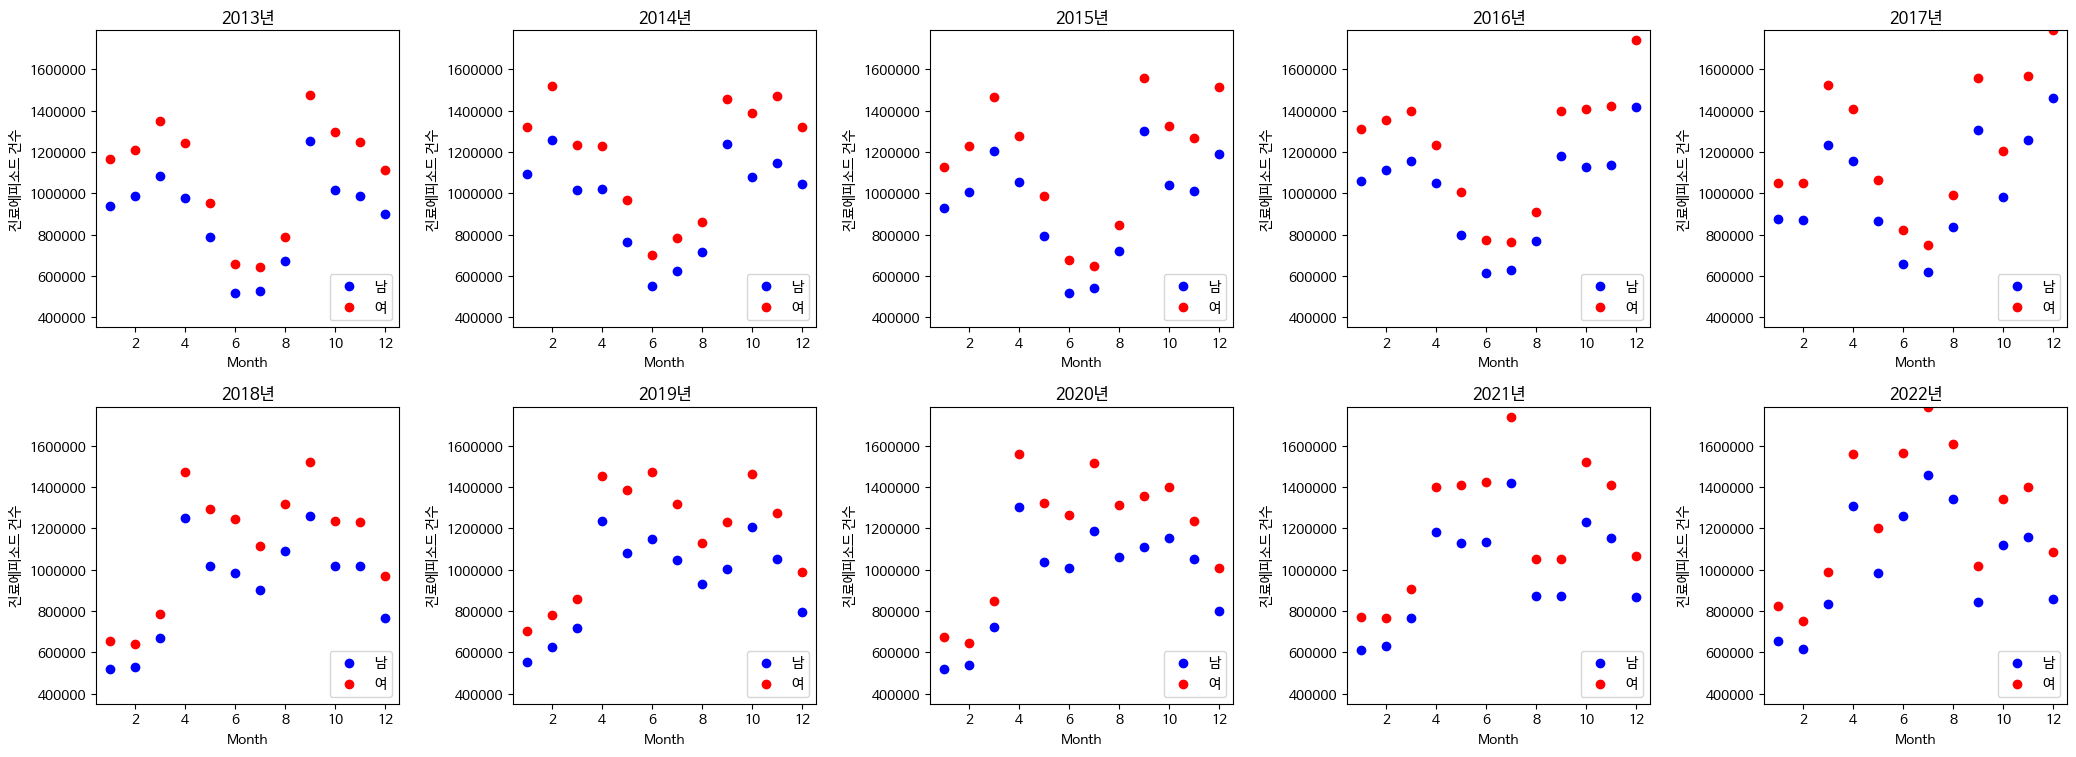

In [22]:
names=['2013년','2014년','2015년','2016년','2017년','2018년','2019년','2020년','2021년','2022년']

# 2행 5열의 subplot 생성
fig, axs = plt.subplots(2, 5,figsize=(21,8))

# 각각의 subplot에 그래프 그리기
for i in range(2):
    for j in range(5):
        # 남성 데이터 도트 플롯
        start_index_male = i * 5 + j * 12
        end_index_male = start_index_male + 12
        axs[i, j].scatter([1,2,3,4,5,6,7,8,9,10,11,12],
                          df1['남성'][start_index_male:end_index_male],
                          marker='o', color='blue', label='남')

        # 여성 데이터 도트 플롯
        start_index_female = i * 5 + j * 12
        end_index_female = start_index_female + 12
        axs[i, j].scatter([1,2,3,4,5,6,7,8,9,10,11,12],
                          df1['여성'][start_index_female:end_index_female],
                          marker='o', color='red', label='여')

        axs[i,j].set_title(names[i*5+j])
        axs[i, j].set_xlabel('Month')
        axs[i, j].set_ylabel('진료에피소드 건수')
        axs[i, j].grid(False)
        axs[i, j].legend(loc='lower right')
        axs[i, j].set_ylim(df1.min().min(),df1.max().max())
        axs[i, j].ticklabel_format(axis='y',useOffset=False,style='plain')


plt.tight_layout(rect=[0, 0, 1, 0.96])  # subplot 간 간격 조절
plt.savefig('/content/drive/MyDrive/EDA 2024-1/scatter_비염')
plt.show()

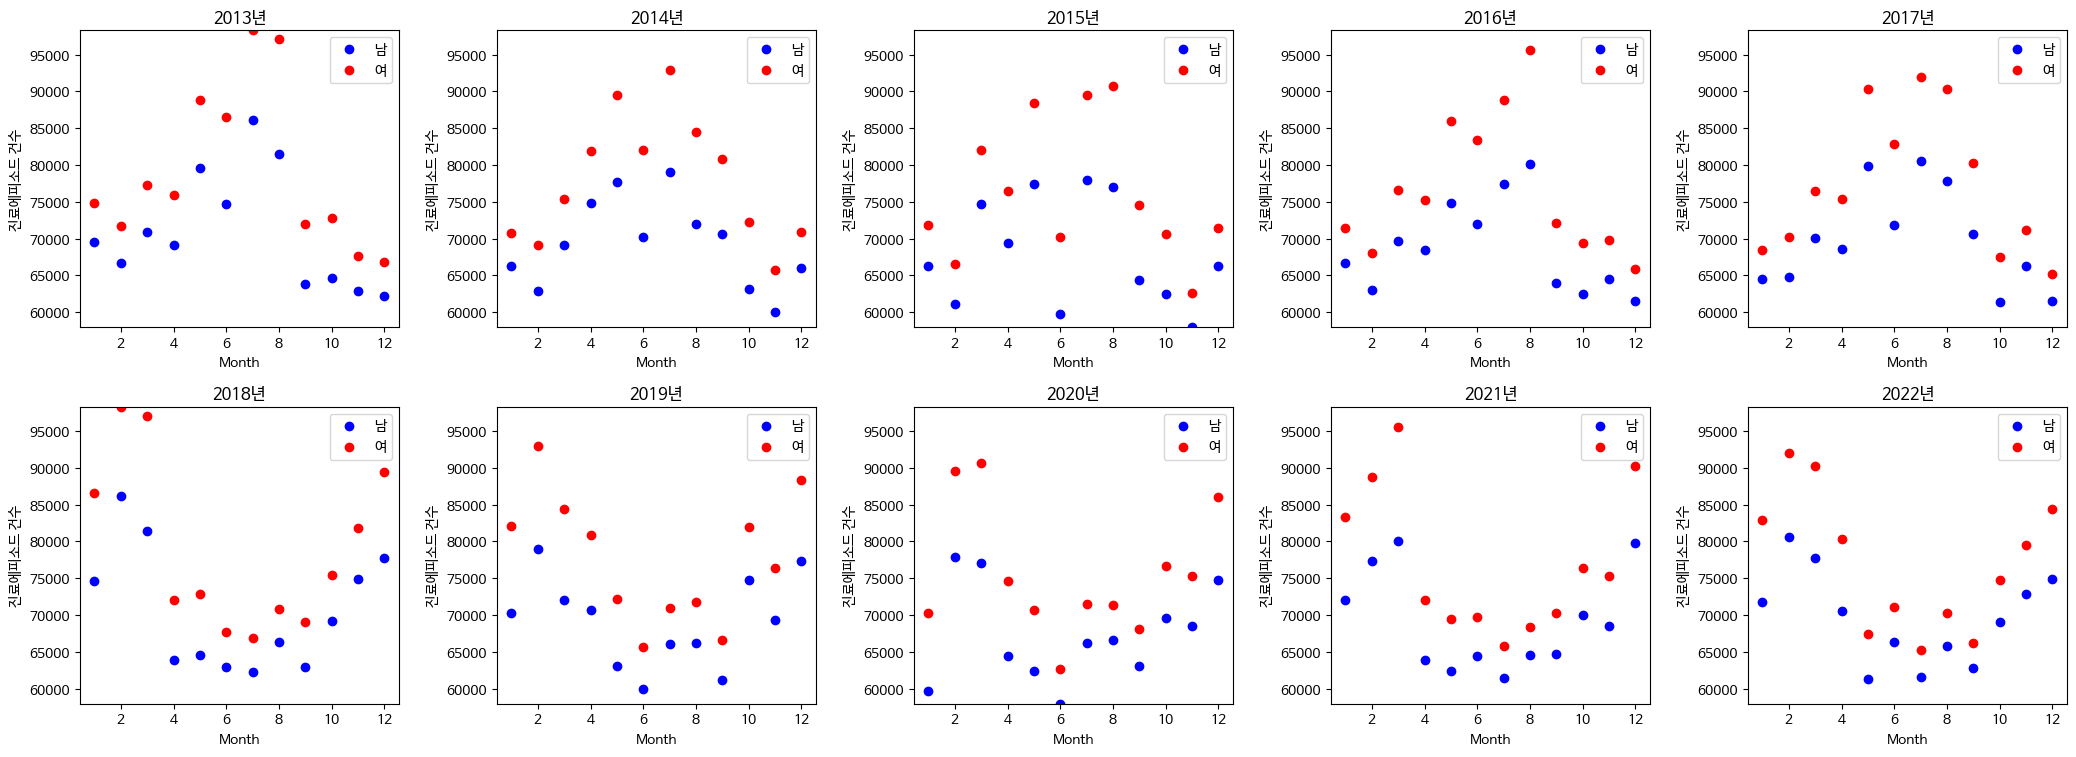

In [23]:
names=['2013년','2014년','2015년','2016년','2017년','2018년','2019년','2020년','2021년','2022년']

# 2행 5열의 subplot 생성
fig, axs = plt.subplots(2, 5,figsize=(21,8))

# 각각의 subplot에 그래프 그리기
for i in range(2):
    for j in range(5):
        # 남성 데이터 도트 플롯
        start_index_male = i * 5 + j * 12
        end_index_male = start_index_male + 12
        axs[i, j].scatter([1,2,3,4,5,6,7,8,9,10,11,12],
                          df2['남성'][start_index_male:end_index_male],
                          marker='o', color='blue', label='남')

        # 여성 데이터 도트 플롯
        start_index_female = i * 5 + j * 12
        end_index_female = start_index_female + 12
        axs[i, j].scatter([1,2,3,4,5,6,7,8,9,10,11,12],
                          df2['여성'][start_index_female:end_index_female],
                          marker='o', color='red', label='여')

        axs[i,j].set_title(names[i*5+j])
        axs[i, j].set_xlabel('Month')
        axs[i, j].set_ylabel('진료에피소드 건수')
        axs[i, j].grid(False)
        axs[i, j].legend(loc='upper right')
        axs[i, j].set_ylim(df2.min().min(),df2.max().max())
        axs[i, j].ticklabel_format(axis='y',useOffset=False,style='plain')


plt.tight_layout(rect=[0, 0, 1, 0.96])  # subplot 간 간격 조절
plt.savefig('/content/drive/MyDrive/EDA 2024-1/scatter_아토피')
plt.show()

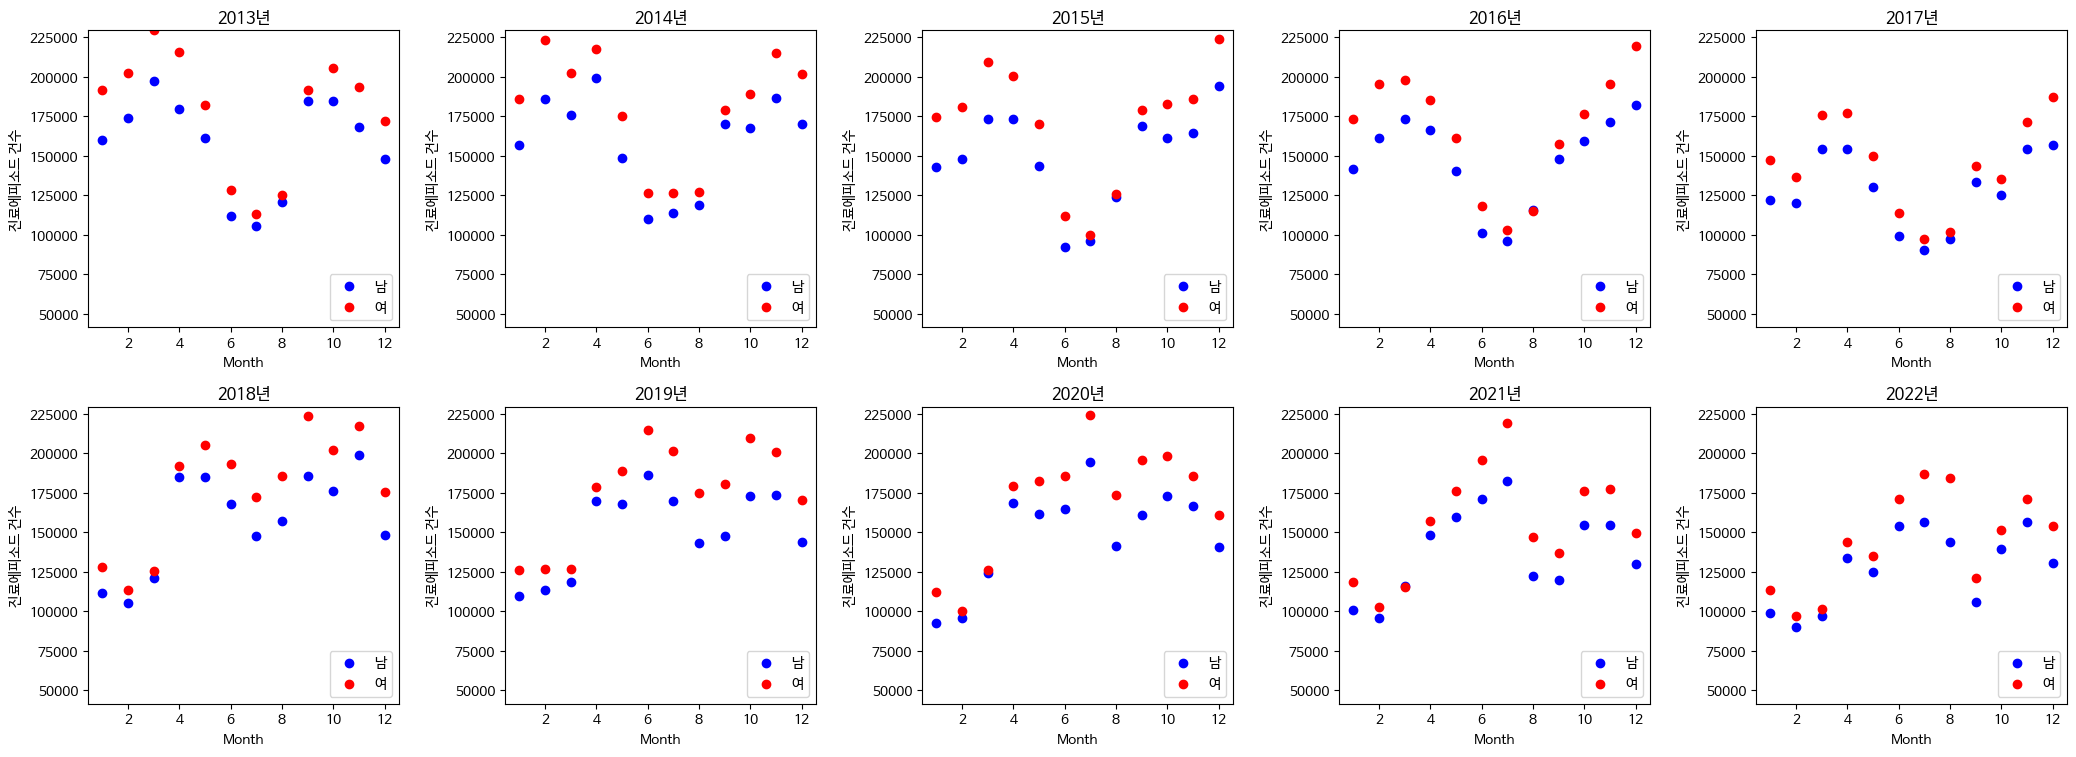

In [24]:
names=['2013년','2014년','2015년','2016년','2017년','2018년','2019년','2020년','2021년','2022년']

# 2행 5열의 subplot 생성
fig, axs = plt.subplots(2, 5,figsize=(21,8))

# 각각의 subplot에 그래프 그리기
for i in range(2):
    for j in range(5):
        # 남성 데이터 도트 플롯
        start_index_male = i * 5 + j * 12
        end_index_male = start_index_male + 12
        axs[i, j].scatter([1,2,3,4,5,6,7,8,9,10,11,12],
                          df3['남성'][start_index_male:end_index_male],
                          marker='o', color='blue', label='남')

        # 여성 데이터 도트 플롯
        start_index_female = i * 5 + j * 12
        end_index_female = start_index_female + 12
        axs[i, j].scatter([1,2,3,4,5,6,7,8,9,10,11,12],
                          df3['여성'][start_index_female:end_index_female],
                          marker='o', color='red', label='여')

        axs[i,j].set_title(names[i*5+j])
        axs[i, j].set_xlabel('Month')
        axs[i, j].set_ylabel('진료에피소드 건수')
        axs[i, j].grid(False)
        axs[i, j].legend(loc='lower right')
        axs[i, j].set_ylim(df3.min().min(),df3.max().max())
        axs[i, j].ticklabel_format(axis='y',useOffset=False,style='plain')


plt.tight_layout(rect=[0, 0, 1, 0.96])  # subplot 간 간격 조절
plt.savefig('/content/drive/MyDrive/EDA 2024-1/scatter_천식')
plt.show()

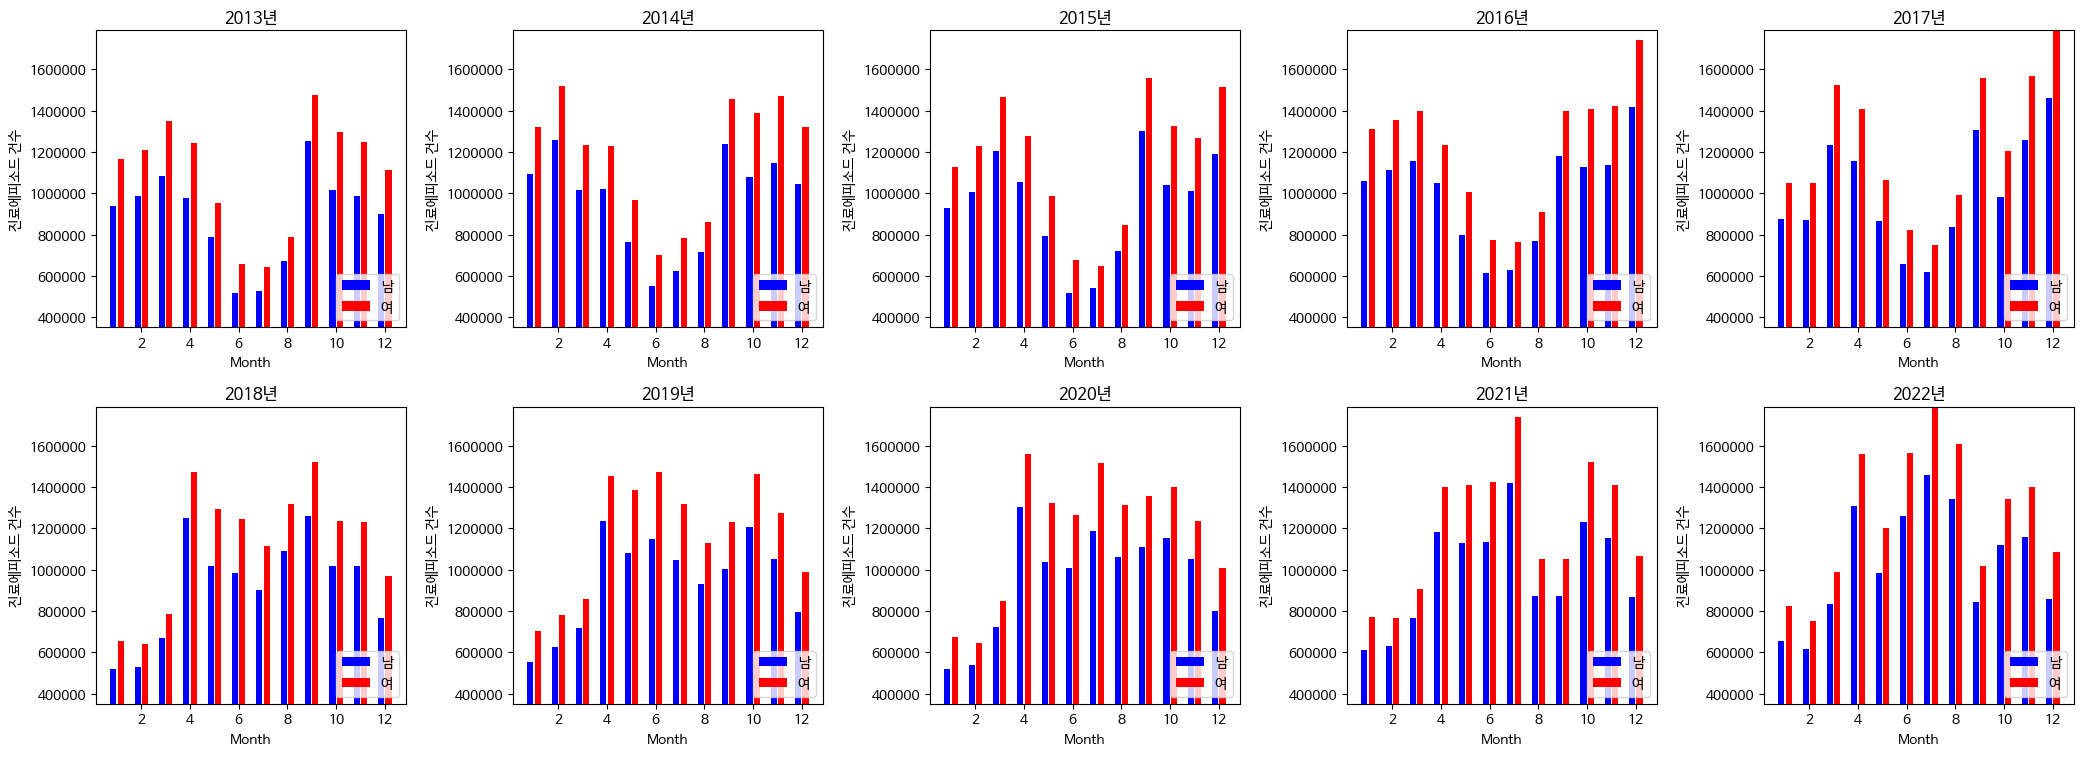

In [25]:
names=['2013년','2014년','2015년','2016년','2017년','2018년','2019년','2020년','2021년','2022년']

# 2행 5열의 subplot 생성
fig, axs = plt.subplots(2, 5,figsize=(21,8))

# 각각의 subplot에 그래프 그리기
for i in range(2):
    for j in range(5):
        # 남성 데이터 도트 플롯
        start_index_male = i * 5 + j * 12
        end_index_male = start_index_male + 12
        axs[i, j].bar([0.85,1.85,2.85,3.85,4.85,5.85,6.85,7.85,8.85,9.85,10.85,11.85],
                          df1['남성'][start_index_male:end_index_male],
                          color='blue', label='남',width=0.25)
        # 여성 데이터 도트 플롯
        start_index_female = i * 5 + j * 12
        end_index_female = start_index_female + 12
        axs[i, j].bar([1.15,2.15,3.15,4.15,5.15,6.15,7.15,8.15,9.15,10.15,11.15,12.15],
                          df1['여성'][start_index_female:end_index_female],
                          color='red', label='여',width=0.25)

        axs[i,j].set_title(names[i*5+j])
        axs[i, j].set_xlabel('Month')
        axs[i, j].set_ylabel('진료에피소드 건수')
        axs[i, j].grid(False)
        axs[i, j].legend(loc='lower right')
        axs[i, j].set_ylim(df1.min().min(),df1.max().max())
        axs[i, j].ticklabel_format(axis='y',useOffset=False,style='plain')


plt.tight_layout(rect=[0, 0, 1, 0.96])  # subplot 간 간격 조절
plt.savefig('/content/drive/MyDrive/EDA 2024-1/bar_비염')
plt.show()

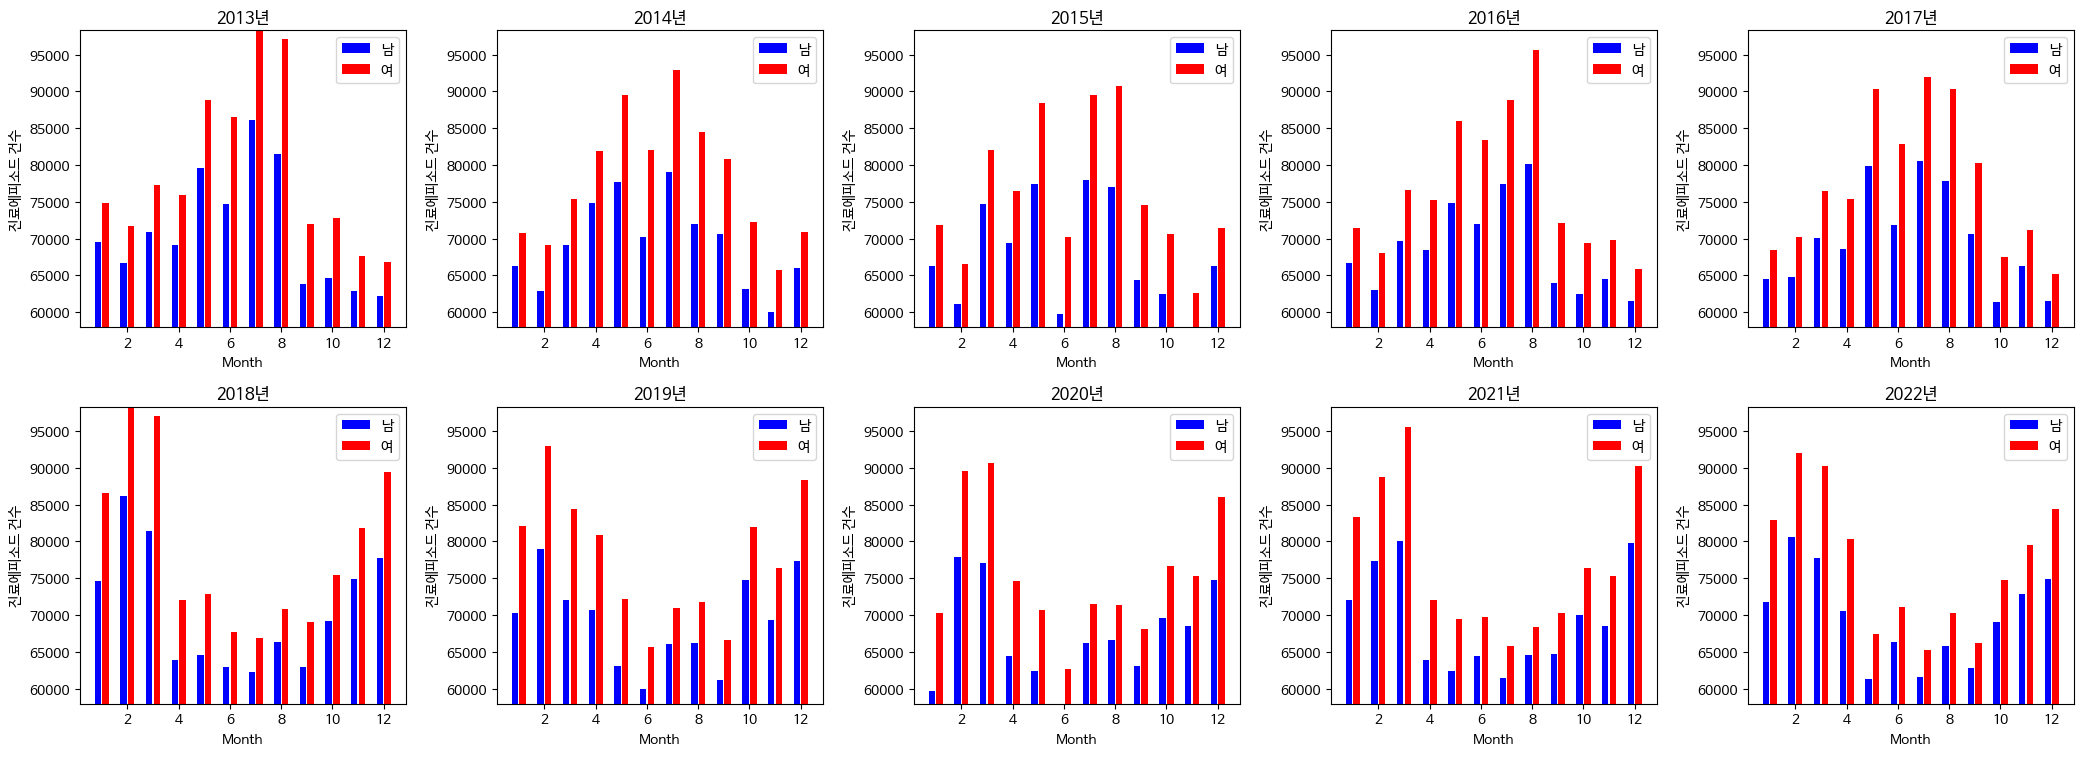

In [26]:
names=['2013년','2014년','2015년','2016년','2017년','2018년','2019년','2020년','2021년','2022년']

# 2행 5열의 subplot 생성
fig, axs = plt.subplots(2, 5,figsize=(21,8))

# 각각의 subplot에 그래프 그리기
for i in range(2):
    for j in range(5):
        # 남성 데이터 도트 플롯
        start_index_male = i * 5 + j * 12
        end_index_male = start_index_male + 12
        axs[i, j].bar([0.85,1.85,2.85,3.85,4.85,5.85,6.85,7.85,8.85,9.85,10.85,11.85],
                          df2['남성'][start_index_male:end_index_male],
                          color='blue', label='남',width=0.25)
        # 여성 데이터 도트 플롯
        start_index_female = i * 5 + j * 12
        end_index_female = start_index_female + 12
        axs[i, j].bar([1.15,2.15,3.15,4.15,5.15,6.15,7.15,8.15,9.15,10.15,11.15,12.15],
                          df2['여성'][start_index_female:end_index_female],
                          color='red', label='여',width=0.25)

        axs[i,j].set_title(names[i*5+j])
        axs[i, j].set_xlabel('Month')
        axs[i, j].set_ylabel('진료에피소드 건수')
        axs[i, j].grid(False)
        axs[i, j].legend(loc='upper right')
        axs[i, j].set_ylim(df2.min().min(),df2.max().max())
        axs[i, j].ticklabel_format(axis='y',useOffset=False,style='plain')


plt.tight_layout(rect=[0, 0, 1, 0.96])  # subplot 간 간격 조절
plt.savefig('/content/drive/MyDrive/EDA 2024-1/bar_아토피')
plt.show()

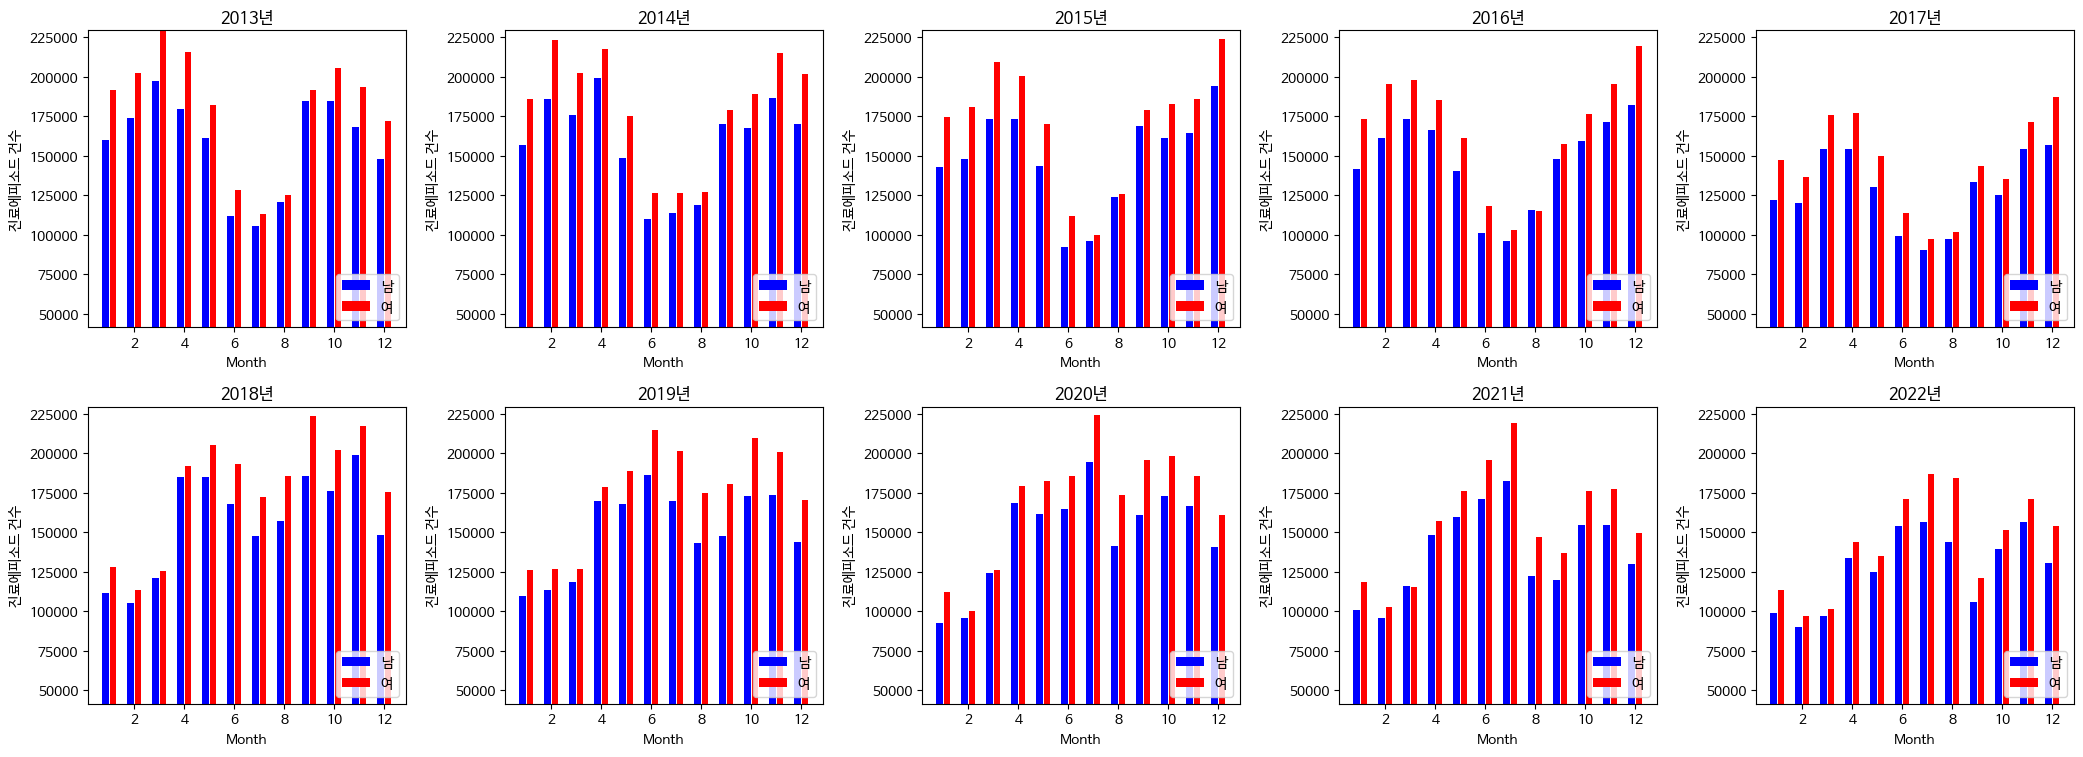

In [27]:
names=['2013년','2014년','2015년','2016년','2017년','2018년','2019년','2020년','2021년','2022년']

# 2행 5열의 subplot 생성
fig, axs = plt.subplots(2, 5,figsize=(21,8))

# 각각의 subplot에 그래프 그리기
for i in range(2):
    for j in range(5):
        # 남성 데이터 도트 플롯
        start_index_male = i * 5 + j * 12
        end_index_male = start_index_male + 12
        axs[i, j].bar([0.85,1.85,2.85,3.85,4.85,5.85,6.85,7.85,8.85,9.85,10.85,11.85],
                          df3['남성'][start_index_male:end_index_male],
                          color='blue', label='남',width=0.25)
        # 여성 데이터 도트 플롯
        start_index_female = i * 5 + j * 12
        end_index_female = start_index_female + 12
        axs[i, j].bar([1.15,2.15,3.15,4.15,5.15,6.15,7.15,8.15,9.15,10.15,11.15,12.15],
                          df3['여성'][start_index_female:end_index_female],
                          color='red', label='여',width=0.25)

        axs[i,j].set_title(names[i*5+j])
        axs[i, j].set_xlabel('Month')
        axs[i, j].set_ylabel('진료에피소드 건수')
        axs[i, j].grid(False)
        axs[i, j].legend(loc='lower right')
        axs[i, j].set_ylim(df3.min().min(),df3.max().max())
        axs[i, j].ticklabel_format(axis='y',useOffset=False,style='plain')


plt.tight_layout(rect=[0, 0, 1, 0.96])  # subplot 간 간격 조절
plt.savefig('/content/drive/MyDrive/EDA 2024-1/bar_천식')
plt.show()

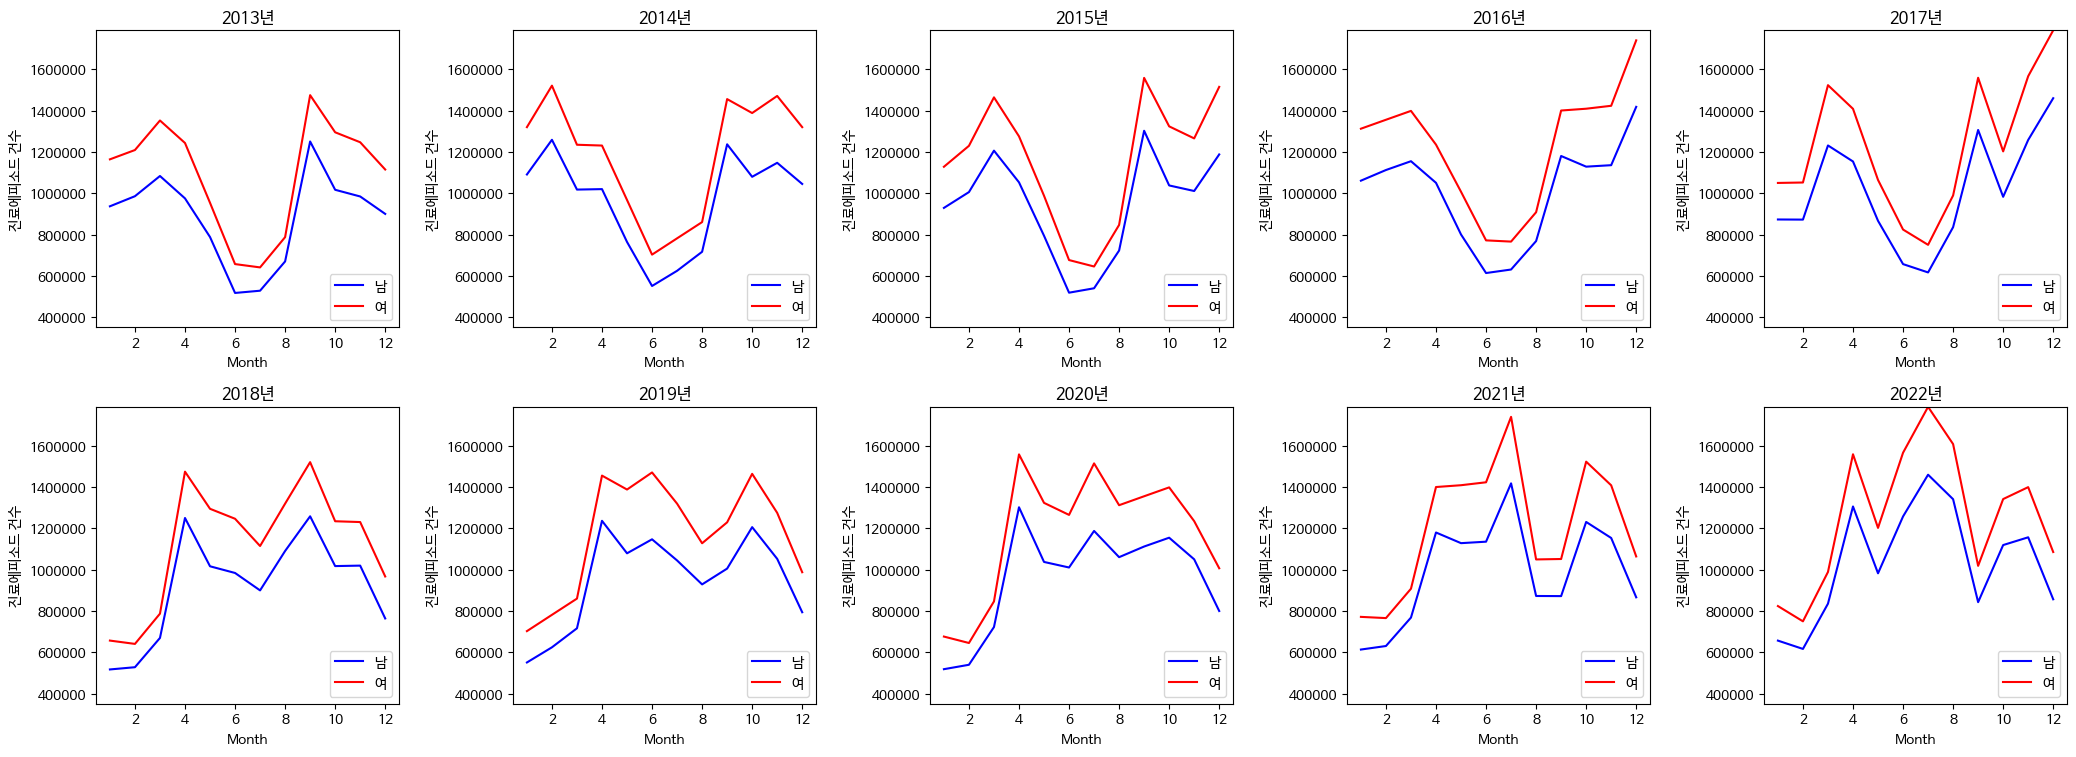

In [28]:
names=['2013년','2014년','2015년','2016년','2017년','2018년','2019년','2020년','2021년','2022년']

# 2행 5열의 subplot 생성
fig, axs = plt.subplots(2, 5,figsize=(21,8))

# 각각의 subplot에 그래프 그리기
for i in range(2):
    for j in range(5):
        # 남성 데이터 도트 플롯
        start_index_male = i * 5 + j * 12
        end_index_male = start_index_male + 12
        axs[i, j].plot([1,2,3,4,5,6,7,8,9,10,11,12],
                          df1['남성'][start_index_male:end_index_male],
                          color='blue', label='남')
        # 여성 데이터 도트 플롯
        start_index_female = i * 5 + j * 12
        end_index_female = start_index_female + 12
        axs[i, j].plot([1,2,3,4,5,6,7,8,9,10,11,12],
                          df1['여성'][start_index_female:end_index_female],
                          color='red', label='여')

        axs[i,j].set_title(names[i*5+j])
        axs[i, j].set_xlabel('Month')
        axs[i, j].set_ylabel('진료에피소드 건수')
        axs[i, j].grid(False)
        axs[i, j].legend(loc='lower right')
        axs[i, j].set_ylim(df1.min().min(),df1.max().max())
        axs[i, j].ticklabel_format(axis='y',useOffset=False,style='plain')


plt.tight_layout(rect=[0, 0, 1, 0.96])  # subplot 간 간격 조절
plt.savefig('/content/drive/MyDrive/EDA 2024-1/line_비염')
plt.show()

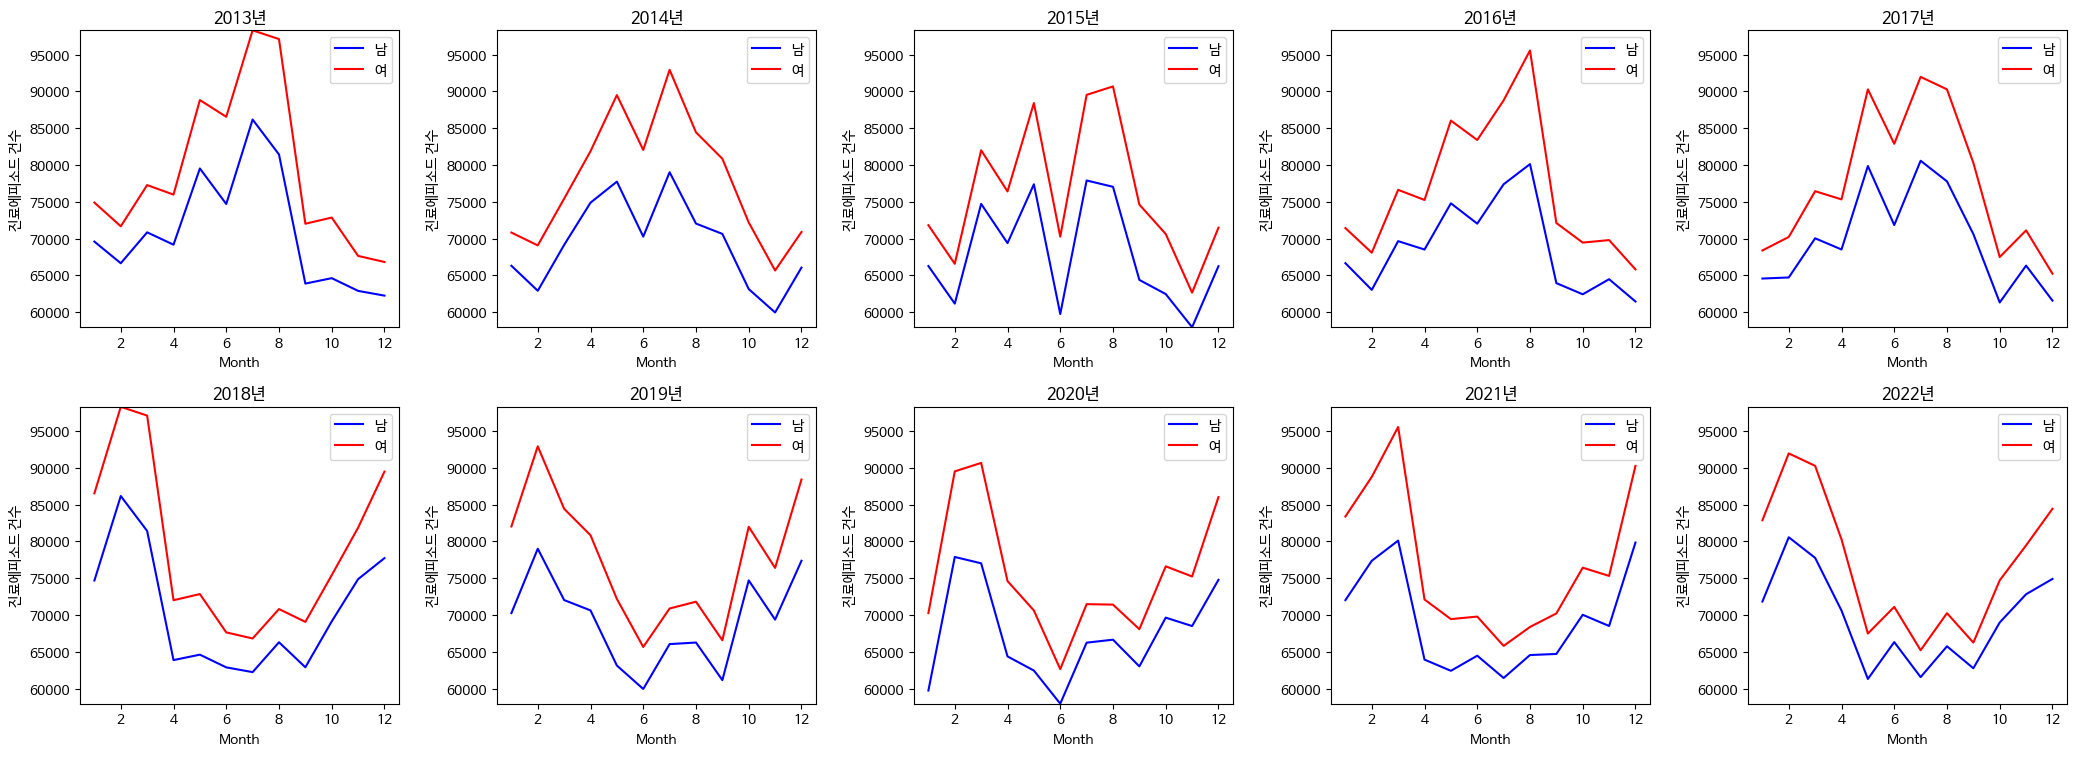

In [29]:
names=['2013년','2014년','2015년','2016년','2017년','2018년','2019년','2020년','2021년','2022년']

# 2행 5열의 subplot 생성
fig, axs = plt.subplots(2, 5,figsize=(21,8))

# 각각의 subplot에 그래프 그리기
for i in range(2):
    for j in range(5):
        # 남성 데이터 도트 플롯
        start_index_male = i * 5 + j * 12
        end_index_male = start_index_male + 12
        axs[i, j].plot([1,2,3,4,5,6,7,8,9,10,11,12],
                          df2['남성'][start_index_male:end_index_male],
                          color='blue', label='남')
        # 여성 데이터 도트 플롯
        start_index_female = i * 5 + j * 12
        end_index_female = start_index_female + 12
        axs[i, j].plot([1,2,3,4,5,6,7,8,9,10,11,12],
                          df2['여성'][start_index_female:end_index_female],
                          color='red', label='여')

        axs[i,j].set_title(names[i*5+j])
        axs[i, j].set_xlabel('Month')
        axs[i, j].set_ylabel('진료에피소드 건수')
        axs[i, j].grid(False)
        axs[i, j].legend(loc='upper right')
        axs[i, j].set_ylim(df2.min().min(),df2.max().max())
        axs[i, j].ticklabel_format(axis='y',useOffset=False,style='plain')


plt.tight_layout(rect=[0, 0, 1, 0.96])  # subplot 간 간격 조절
plt.savefig('/content/drive/MyDrive/EDA 2024-1/line_아토피')
plt.show()

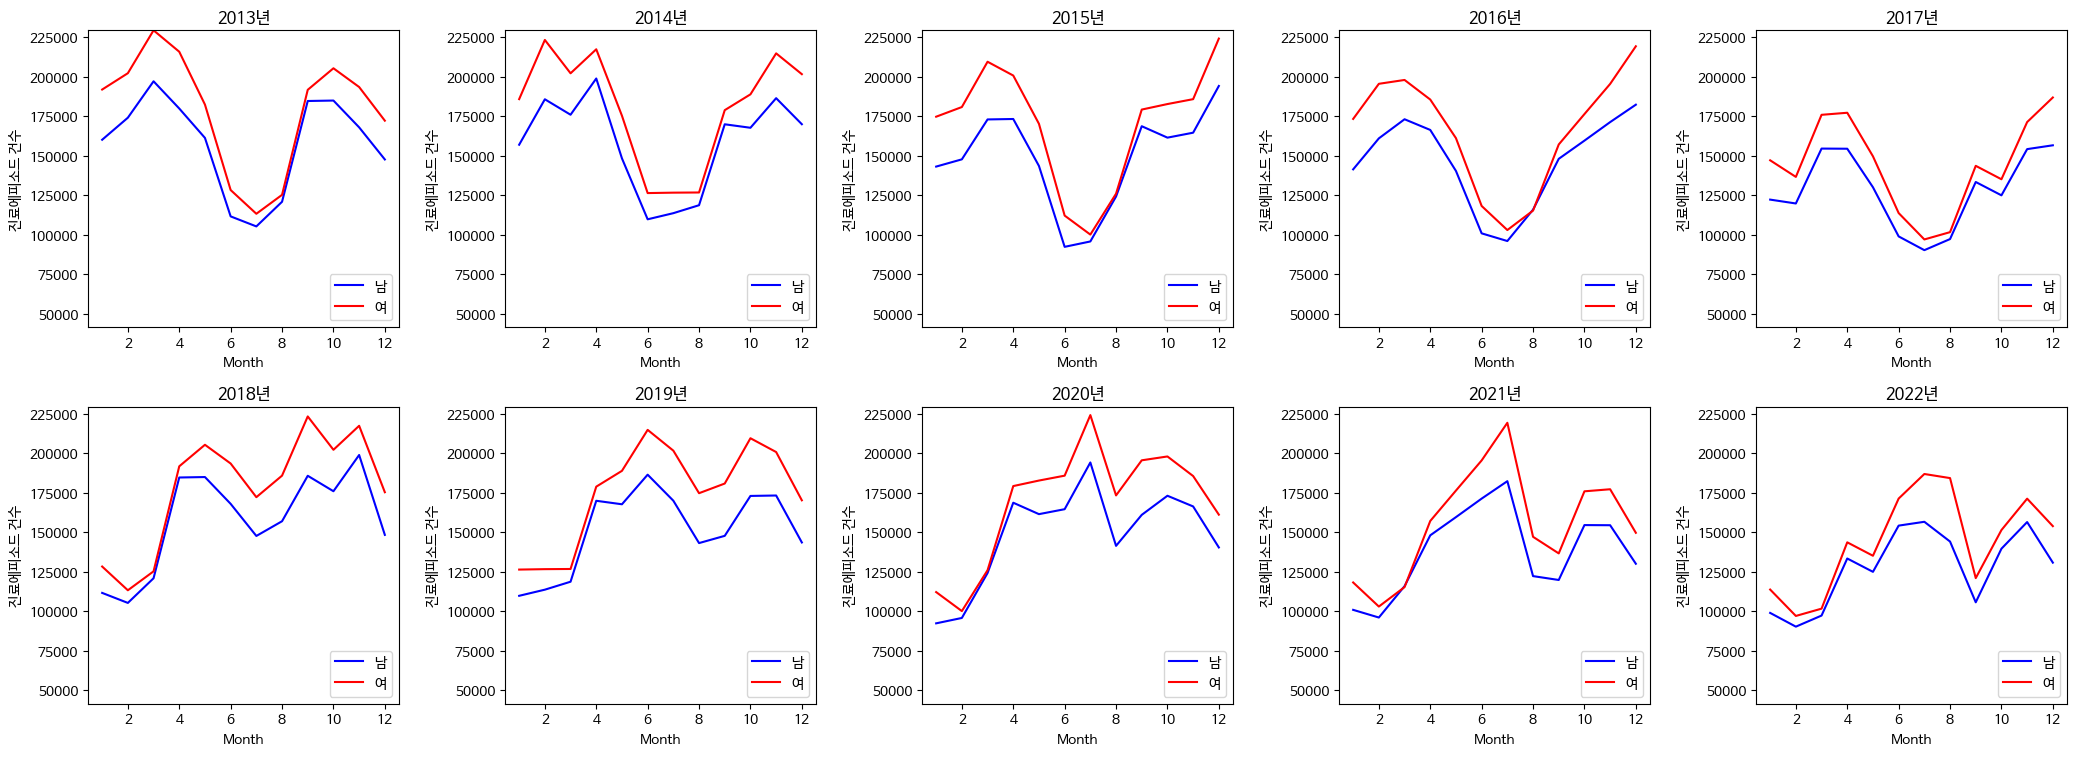

In [30]:
names=['2013년','2014년','2015년','2016년','2017년','2018년','2019년','2020년','2021년','2022년']

# 2행 5열의 subplot 생성
fig, axs = plt.subplots(2, 5,figsize=(21,8))

# 각각의 subplot에 그래프 그리기
for i in range(2):
    for j in range(5):
        # 남성 데이터 도트 플롯
        start_index_male = i * 5 + j * 12
        end_index_male = start_index_male + 12
        axs[i, j].plot([1,2,3,4,5,6,7,8,9,10,11,12],
                          df3['남성'][start_index_male:end_index_male],
                          color='blue', label='남')
        # 여성 데이터 도트 플롯
        start_index_female = i * 5 + j * 12
        end_index_female = start_index_female + 12
        axs[i, j].plot([1,2,3,4,5,6,7,8,9,10,11,12],
                          df3['여성'][start_index_female:end_index_female],
                          color='red', label='여')

        axs[i,j].set_title(names[i*5+j])
        axs[i, j].set_xlabel('Month')
        axs[i, j].set_ylabel('진료에피소드 건수')
        axs[i, j].grid(False)
        axs[i, j].legend(loc='lower right')
        axs[i, j].set_ylim(df3.min().min(),df3.max().max())
        axs[i, j].ticklabel_format(axis='y',useOffset=False,style='plain')


plt.tight_layout(rect=[0, 0, 1, 0.96])  # subplot 간 간격 조절
plt.savefig('/content/drive/MyDrive/EDA 2024-1/line_천식')
plt.show()

전체 인구수 대비 남녀의 환경성질환 비


In [31]:
#환자수를 에피소드 건수로 대체
M=M.T
W=W.T
M.index=df1_M.index
W.index=df1_W.index

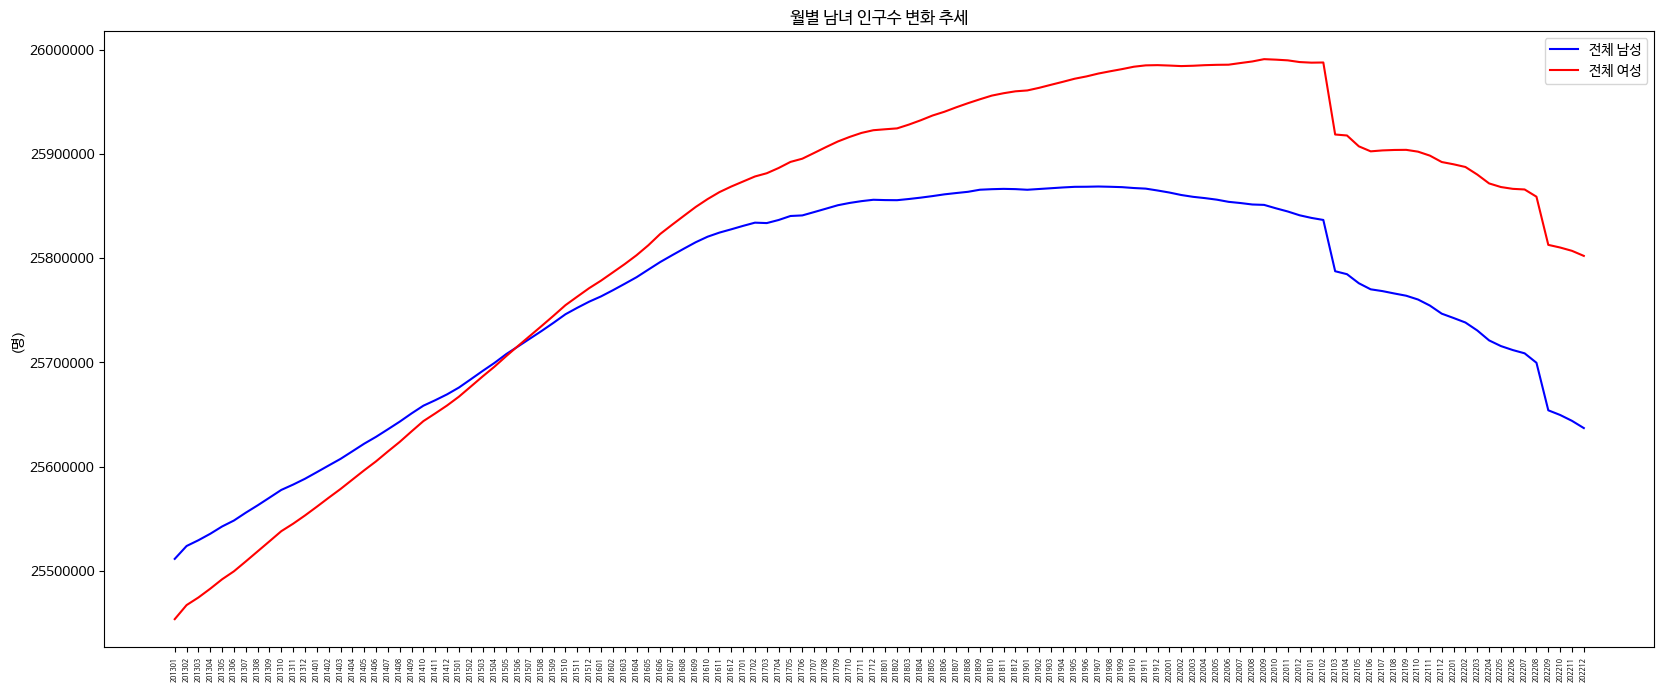

In [32]:
plt.figure(figsize=(20,8))
plt.plot(M.index.astype('str'),M.iloc[:,0],color="blue",label="전체 남성")
plt.plot(W.index.astype('str'),W.iloc[:,0],color="red",label="전체 여성")
plt.title("월별 남녀 인구수 변화 추세")
plt.ylabel("(명)")
plt.ticklabel_format(axis='y',useOffset=False,style='plain')
plt.xticks(rotation=90,fontsize=5)
plt.legend()
plt.show()

In [48]:
df1_M=pd.DataFrame(df1_M)
df1_W=pd.DataFrame(df1_W)
df2_M=pd.DataFrame(df2_M)
df2_W=pd.DataFrame(df2_W)
df3_M=pd.DataFrame(df3_M)
df3_W=pd.DataFrame(df3_W)

In [49]:
df4_M=(df1_M.iloc[:,0].div(M.iloc[:,0]))
df4_W=(df1_W.iloc[:,0].div(W.iloc[:,0]))
df4_M #2013~2022년 월별 남성 인구수 대비 비염
df4_W #2013~2022년 월별 여성 인구수 대비 비염

요양개시연월
201301    0.045724
201302    0.047468
201303    0.053061
201304    0.048773
201305    0.037406
            ...   
202208    0.034889
202209    0.042758
202210    0.044834
202211    0.043989
202212    0.046657
Length: 120, dtype: float64

In [51]:
df5_M=(df2_M.iloc[:,0].div(M.iloc[:,0]))
df5_W=(df2_W.iloc[:,0].div(W.iloc[:,0]))
df5_M #2013~2022년 월별 남성 인구수 대비 아토피
df5_W #2013~2022년 월별 여성 인구수 대비 아토피

요양개시연월
201301    0.002942
201302    0.002814
201303    0.003033
201304    0.002981
201305    0.003484
            ...   
202208    0.003559
202209    0.003329
202210    0.003098
202211    0.002878
202212    0.002965
Length: 120, dtype: float64

In [52]:
df6_M=(df3_M.iloc[:,0].div(M.iloc[:,0]))
df6_W=(df3_W.iloc[:,0].div(W.iloc[:,0]))
df6_M #2013~2022년 월별 남성 인구수 대비 천식
df6_W #2013~2022년 월별 여성 인구수 대비 천식

요양개시연월
201301    0.007542
201302    0.007944
201303    0.009007
201304    0.008472
201305    0.007157
            ...   
202208    0.002755
202209    0.003781
202210    0.003988
202211    0.003611
202212    0.003415
Length: 120, dtype: float64

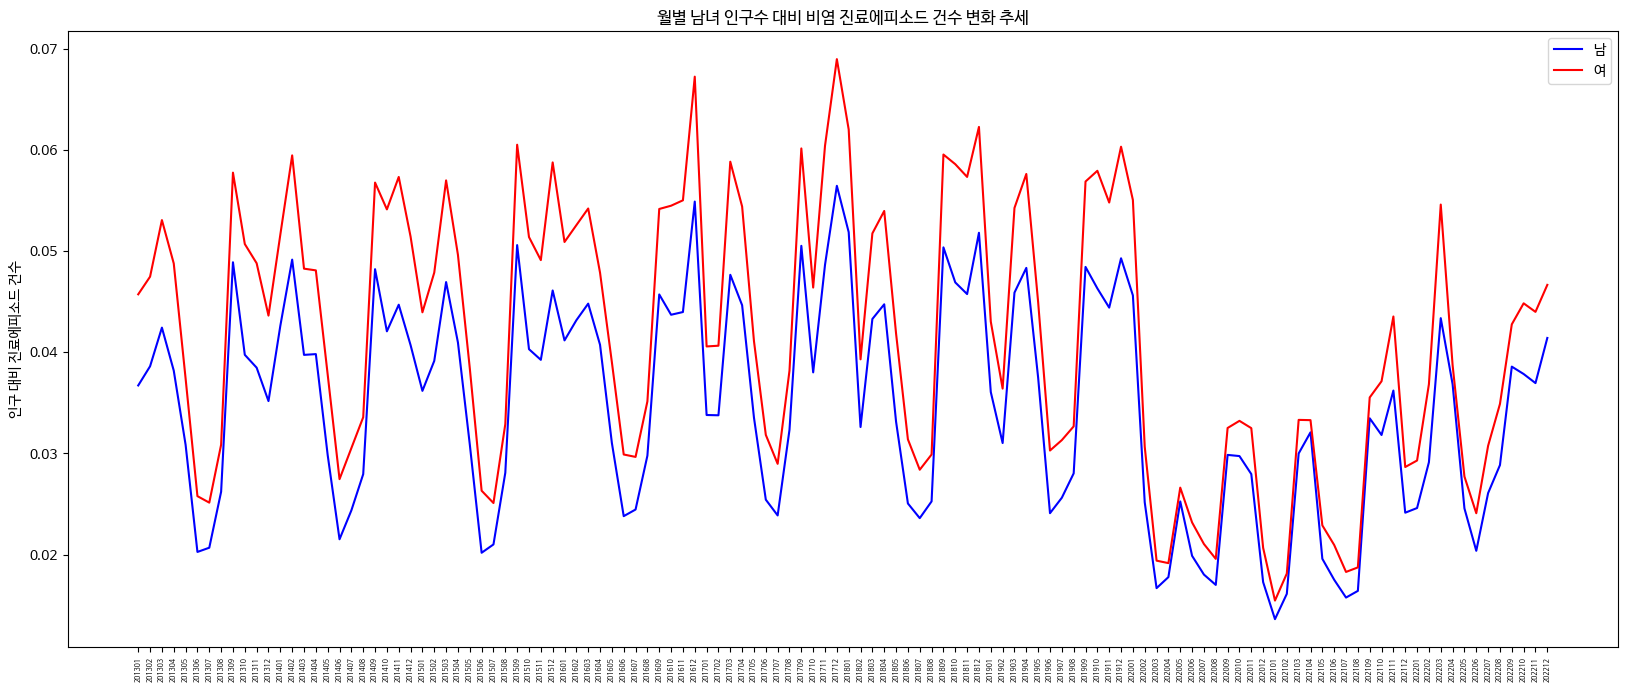

In [53]:
plt.figure(figsize=(20,8))
plt.plot(df4_M.index.astype('str'),df4_M.iloc[:].to_list(),color="blue",label="남")
plt.plot(df4_W.index.astype('str'),df4_W.iloc[:].to_list(),color="red",label="여")
plt.title("월별 남녀 인구수 대비 비염 진료에피소드 건수 변화 추세")
plt.ylabel("인구 대비 진료에피소드 건수")
plt.xticks(rotation=90,fontsize=5)
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/인구대비_비염")
plt.show()

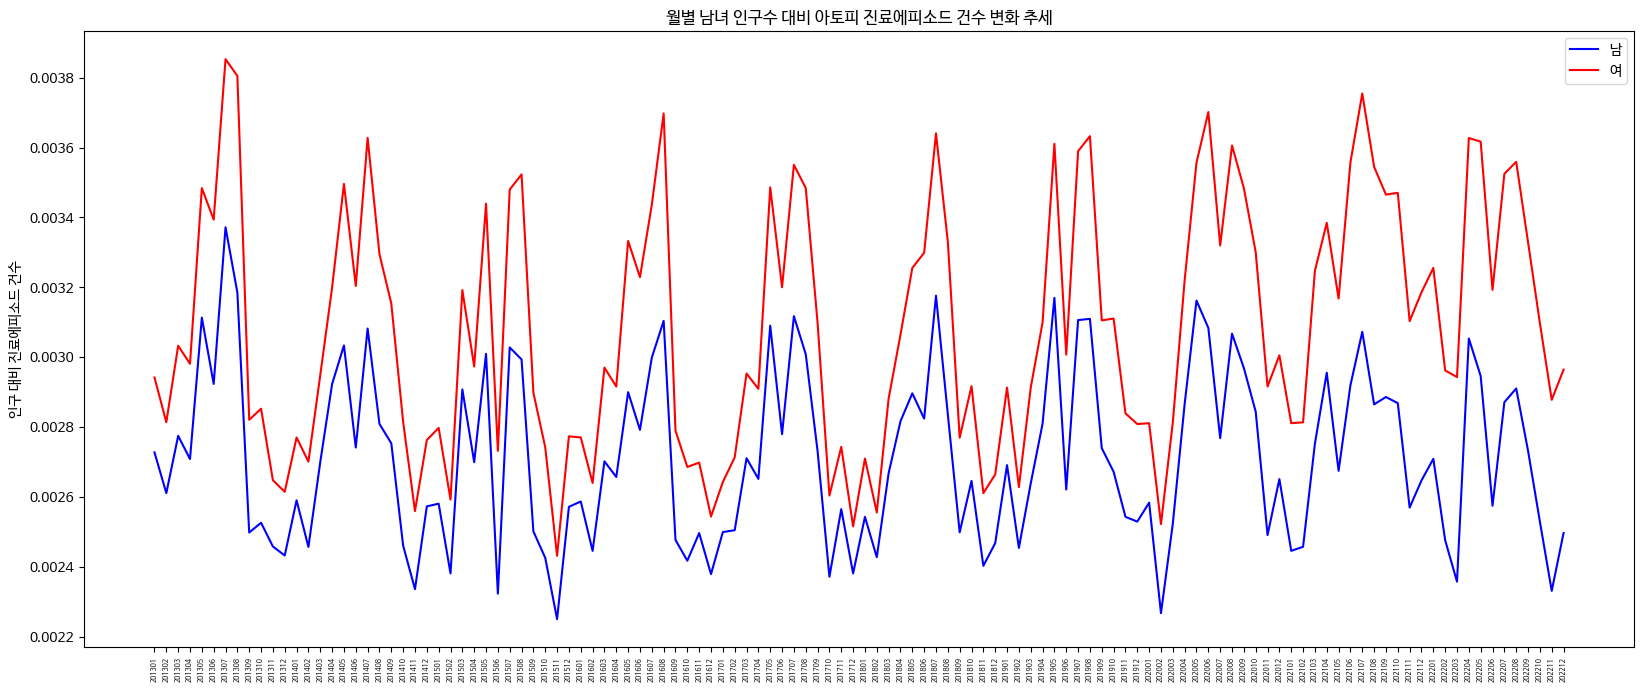

In [54]:
plt.figure(figsize=(20,8))
plt.plot(df5_M.index.astype('str'),df5_M.iloc[:].to_list(),color="blue",label="남")
plt.plot(df5_W.index.astype('str'),df5_W.iloc[:].to_list(),color="red",label="여")
plt.title("월별 남녀 인구수 대비 아토피 진료에피소드 건수 변화 추세")
plt.ylabel("인구 대비 진료에피소드 건수")
plt.xticks(rotation=90,fontsize=5)
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/인구대비_아토피")
plt.show()

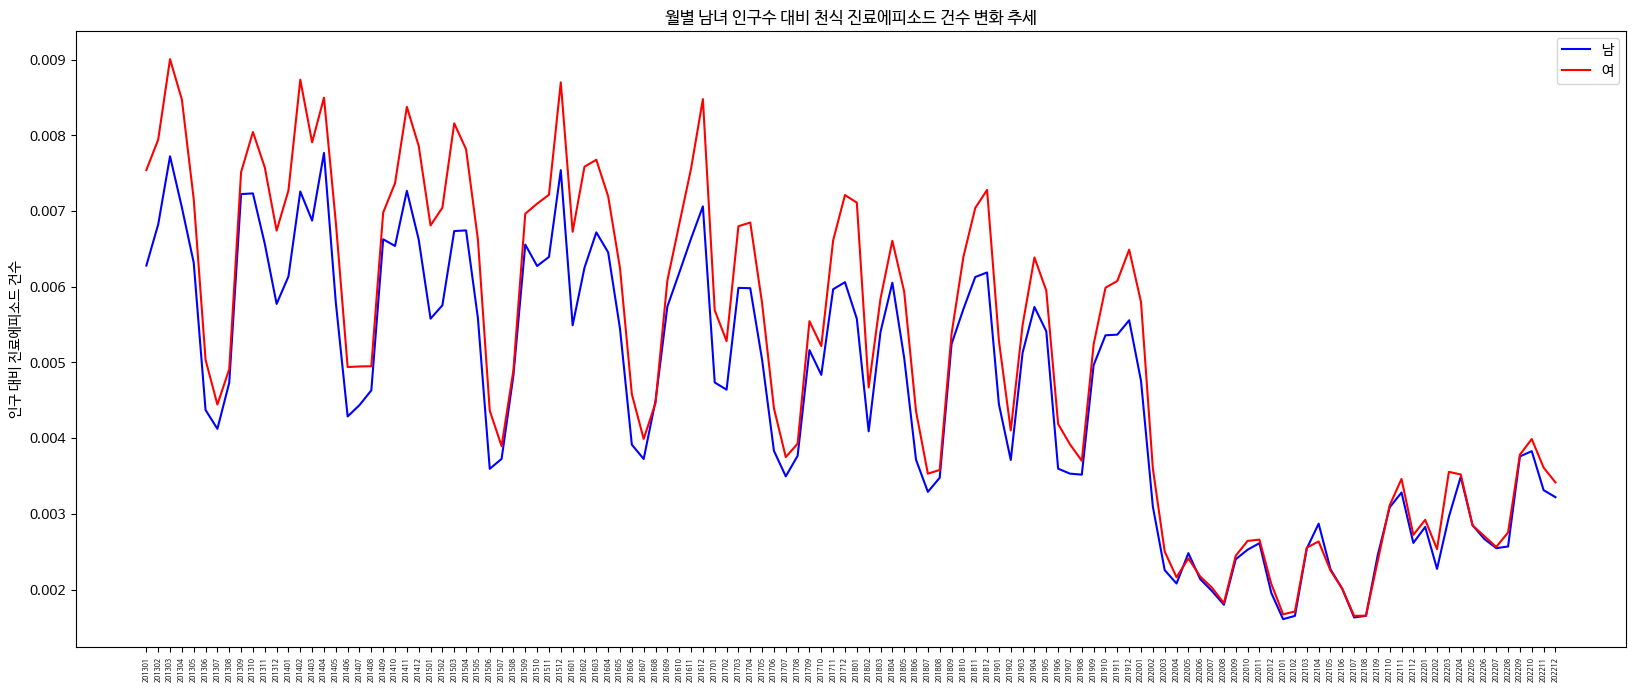

In [55]:
plt.figure(figsize=(20,8))
plt.plot(df6_M.index.astype('str'),df6_M.iloc[:].to_list(),color="blue",label="남")
plt.plot(df6_W.index.astype('str'),df6_W.iloc[:].to_list(),color="red",label="여")
plt.title("월별 남녀 인구수 대비 천식 진료에피소드 건수 변화 추세")
plt.ylabel("인구 대비 진료에피소드 건수")
plt.xticks(rotation=90,fontsize=5)
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/인구대비_천식")
plt.show()

연별 시각화

In [56]:
df1_M_yearly=pd.DataFrame()

df1_M_yearly['2013년']=df1_M[0:12].sum()
df1_M_yearly['2014년']=df1_M[12:24].sum()
df1_M_yearly['2015년']=df1_M[24:36].sum()
df1_M_yearly['2016년']=df1_M[36:48].sum()
df1_M_yearly['2017년']=df1_M[48:60].sum()
df1_M_yearly['2018년']=df1_M[60:72].sum()
df1_M_yearly['2019년']=df1_M[72:84].sum()
df1_M_yearly['2020년']=df1_M[84:96].sum()
df1_M_yearly['2021년']=df1_M[96:108].sum()
df1_M_yearly['2022년']=df1_M[108:120].sum()

df1_M_yearly=df1_M_yearly.T[['진료에피소드 건수']]
df1_M_yearly #2013~2022년 연별 남성 비염 에피소드 건수

,진료에피소드 건수
2013년,10635506
2014년,11551220
2015년,11307009
2016년,12053388
2017년,12111736
2018년,12267796
2019년,12027172
2020년,7503210
2021년,7389826
2022년,9983386


In [57]:
df1_W_yearly=pd.DataFrame()

df1_W_yearly['2013년']=df1_W[0:12].sum()
df1_W_yearly['2014년']=df1_W[12:24].sum()
df1_W_yearly['2015년']=df1_W[24:36].sum()
df1_W_yearly['2016년']=df1_W[36:48].sum()
df1_W_yearly['2017년']=df1_W[48:60].sum()
df1_W_yearly['2018년']=df1_W[60:72].sum()
df1_W_yearly['2019년']=df1_W[72:84].sum()
df1_W_yearly['2020년']=df1_W[84:96].sum()
df1_W_yearly['2021년']=df1_W[96:108].sum()
df1_W_yearly['2022년']=df1_W[108:120].sum()

df1_W_yearly=df1_W_yearly.T[['진료에피소드 건수']]
df1_W_yearly #2013~2022년 연별 여성 비염 에피소드 건수

,진료에피소드 건수
2013년,13136730
2014년,14250182
2015년,13913273
2016년,14724444
2017년,14774605
2018년,14949762
2019년,14557447
2020년,8668376
2021년,8444614
2022년,11764612


In [58]:
df2_M_yearly=pd.DataFrame()

df2_M_yearly['2013년']=df2_M[0:12].sum()
df2_M_yearly['2014년']=df2_M[12:24].sum()
df2_M_yearly['2015년']=df2_M[24:36].sum()
df2_M_yearly['2016년']=df2_M[36:48].sum()
df2_M_yearly['2017년']=df2_M[48:60].sum()
df2_M_yearly['2018년']=df2_M[60:72].sum()
df2_M_yearly['2019년']=df2_M[72:84].sum()
df2_M_yearly['2020년']=df2_M[84:96].sum()
df2_M_yearly['2021년']=df2_M[96:108].sum()
df2_M_yearly['2022년']=df2_M[108:120].sum()

df2_M_yearly=df2_M_yearly.T[['진료에피소드 건수']]
df2_M_yearly #2013~2022년 연별 남성 아토피 에피소드 건수

,진료에피소드 건수
2013년,851728
2014년,832090
2015년,814643
2016년,824476
2017년,837717
2018년,832918
2019년,855894
2020년,860410
2021년,853714
2022년,822093


In [59]:
df2_W_yearly=pd.DataFrame()

df2_W_yearly['2013년']=df2_W[0:12].sum()
df2_W_yearly['2014년']=df2_W[12:24].sum()
df2_W_yearly['2015년']=df2_W[24:36].sum()
df2_W_yearly['2016년']=df2_W[36:48].sum()
df2_W_yearly['2017년']=df2_W[48:60].sum()
df2_W_yearly['2018년']=df2_W[60:72].sum()
df2_W_yearly['2019년']=df2_W[72:84].sum()
df2_W_yearly['2020년']=df2_W[84:96].sum()
df2_W_yearly['2021년']=df2_W[96:108].sum()
df2_W_yearly['2022년']=df2_W[108:120].sum()

df2_W_yearly=df2_W_yearly.T[['진료에피소드 건수']]
df2_W_yearly #2013~2022년 연별 여성 아토피 에피소드 건수

,진료에피소드 건수
2013년,949877
2014년,935661
2015년,915041
2016년,922285
2017년,929856
2018년,926162
2019년,967801
2020년,994233
2021년,1023905
2022년,1007011


In [60]:
df3_M_yearly=pd.DataFrame()

df3_M_yearly['2013년']=df3_M[0:12].sum()
df3_M_yearly['2014년']=df3_M[12:24].sum()
df3_M_yearly['2015년']=df3_M[24:36].sum()
df3_M_yearly['2016년']=df3_M[36:48].sum()
df3_M_yearly['2017년']=df3_M[48:60].sum()
df3_M_yearly['2018년']=df3_M[60:72].sum()
df3_M_yearly['2019년']=df3_M[72:84].sum()
df3_M_yearly['2020년']=df3_M[84:96].sum()
df3_M_yearly['2021년']=df3_M[96:108].sum()
df3_M_yearly['2022년']=df3_M[108:120].sum()

df3_M_yearly=df3_M_yearly.T[['진료에피소드 건수']]
df3_M_yearly #2013~2022년 연별 남성 천식 에피소드 건수

,진료에피소드 건수
2013년,1896352
2014년,1902907
2015년,1782736
2016년,1757106
2017년,1537612
2018년,1549795
2019년,1456952
2020년,777724
2021년,713359
2022년,932605


In [61]:
df3_W_yearly=pd.DataFrame()

df3_W_yearly['2013년']=df3_W[0:12].sum()
df3_W_yearly['2014년']=df3_W[12:24].sum()
df3_W_yearly['2015년']=df3_W[24:36].sum()
df3_W_yearly['2016년']=df3_W[36:48].sum()
df3_W_yearly['2017년']=df3_W[48:60].sum()
df3_W_yearly['2018년']=df3_W[60:72].sum()
df3_W_yearly['2019년']=df3_W[72:84].sum()
df3_W_yearly['2020년']=df3_W[84:96].sum()
df3_W_yearly['2021년']=df3_W[96:108].sum()
df3_W_yearly['2022년']=df3_W[108:120].sum()

df3_W_yearly=df3_W_yearly.T[['진료에피소드 건수']]
df3_W_yearly #2013~2022년 연별 여성 천식 에피소드 건수

,진료에피소드 건수
2013년,2152165
2014년,2168764
2015년,2046982
2016년,1999095
2017년,1736715
2018년,1756776
2019년,1631696
2020년,839709
2021년,720943
2022년,987239


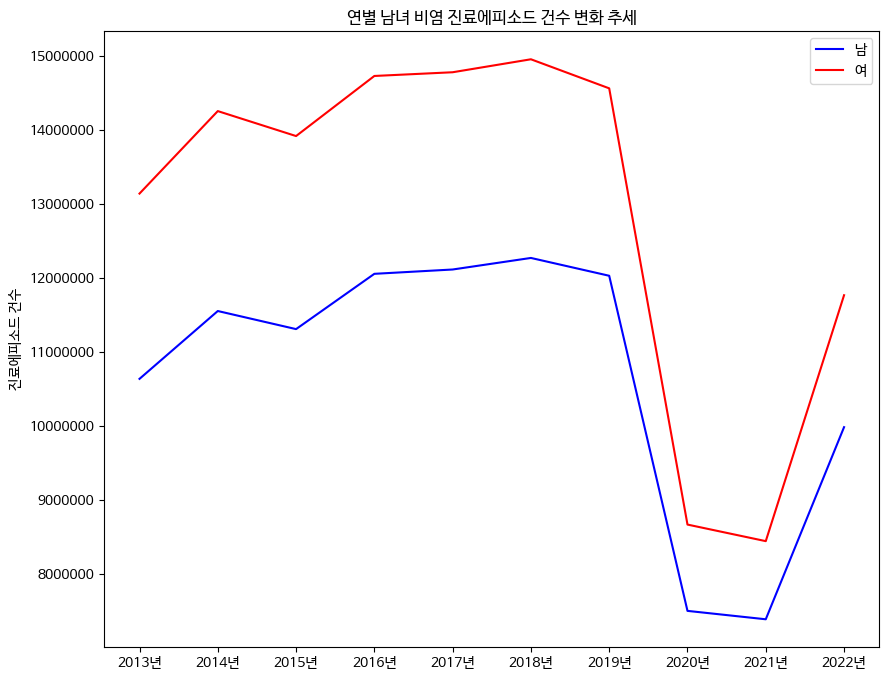

In [62]:
plt.figure(figsize=(10,8))
plt.plot(df1_M_yearly.index.astype('str'),df1_M_yearly["진료에피소드 건수"],color="blue",label="남")
plt.plot(df1_W_yearly.index.astype('str'),df1_W_yearly["진료에피소드 건수"],color="red",label="여")
plt.title("연별 남녀 비염 진료에피소드 건수 변화 추세")
plt.ylabel("진료에피소드 건수")
plt.ticklabel_format(axis='y',useOffset=False,style='plain')
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/성별_비염_yearly")
plt.show()

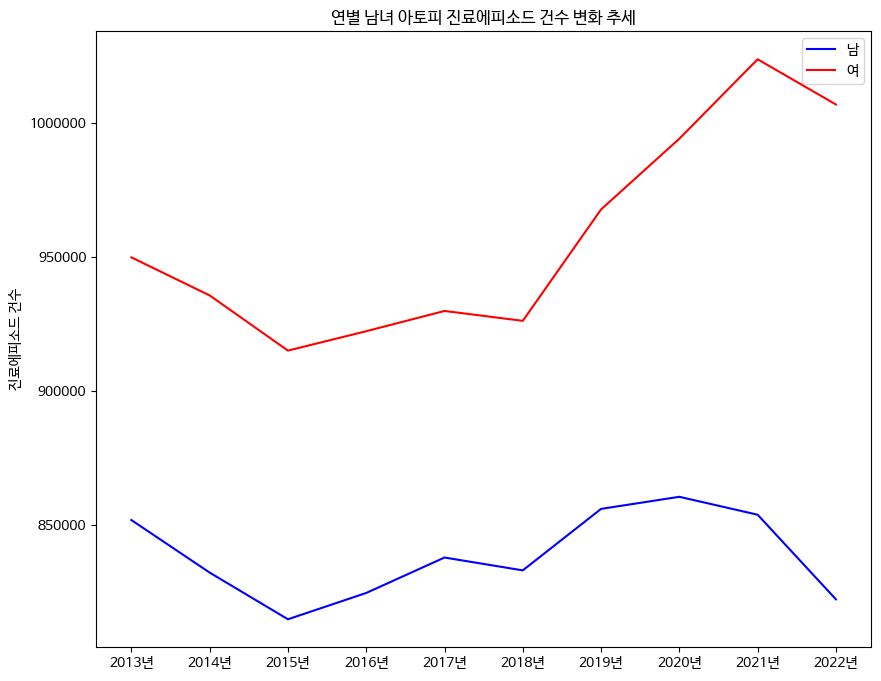

In [63]:
plt.figure(figsize=(10,8))
plt.plot(df2_M_yearly.index.astype('str'),df2_M_yearly["진료에피소드 건수"],color="blue",label="남")
plt.plot(df2_W_yearly.index.astype('str'),df2_W_yearly["진료에피소드 건수"],color="red",label="여")
plt.title("연별 남녀 아토피 진료에피소드 건수 변화 추세")
plt.ylabel("진료에피소드 건수")
plt.ticklabel_format(axis='y',useOffset=False,style='plain')
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/성별_아토피_yearly")
plt.show()

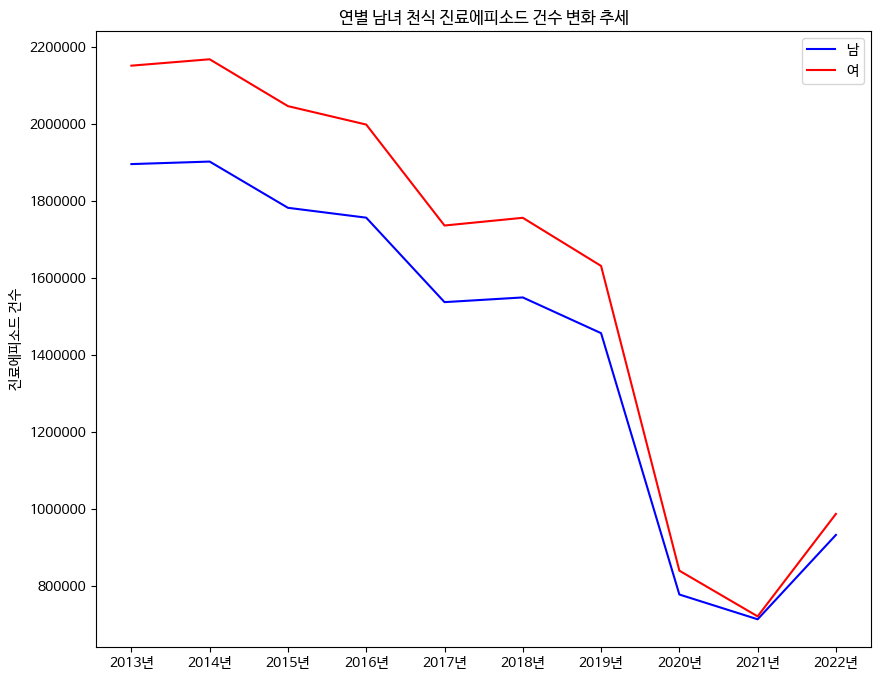

In [64]:
plt.figure(figsize=(10,8))
plt.plot(df3_M_yearly.index.astype('str'),df3_M_yearly["진료에피소드 건수"],color="blue",label="남")
plt.plot(df3_W_yearly.index.astype('str'),df3_W_yearly["진료에피소드 건수"],color="red",label="여")
plt.title("연별 남녀 천식 진료에피소드 건수 변화 추세")
plt.ylabel("진료에피소드 건수")
plt.ticklabel_format(axis='y',useOffset=False,style='plain')
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/성별_천식_yearly")
plt.show()

(여성-남성) 진료에피소드 건수

In [65]:
M_yearly=M.iloc[[11,23,35,47,59,71,83,95,107,119]]
W_yearly=W.iloc[[11,23,35,47,59,71,83,95,107,119]]
M_yearly.index=['2013년','2014년','2015년','2016년','2017년','2018년','2019년','2020년','2021년','2022년']
W_yearly.index=['2013년','2014년','2015년','2016년','2017년','2018년','2019년','2020년','2021년','2022년']

In [66]:
df4_M_yearly=(df1_M_yearly.iloc[:,0].div(M_yearly.iloc[:,0]))
df4_W_yearly=(df1_W_yearly.iloc[:,0].div(W_yearly.iloc[:,0]))
df4_M_yearly #2013~2022년 연별 남성 인구수 대비 비염
df4_W_yearly #2013~2022년 연별 여성 인구수 대비 비염

2013년    0.514095
2014년    0.555376
2015년    0.539878
2016년    0.569201
2017년    0.569950
2018년    0.575878
2019년    0.560224
2020년    0.333553
2021년    0.326146
2022년    0.455956
dtype: float64

In [67]:
df5_M_yearly=(df2_M_yearly.iloc[:,0].div(M_yearly.iloc[:,0]))
df5_W_yearly=(df2_W_yearly.iloc[:,0].div(W_yearly.iloc[:,0]))
df5_M_yearly #2013~2022년 연별 남성 인구수 대비 아토피
df5_W_yearly #2013~2022년 연별 여성 인구수 대비 아토피

2013년    0.037173
2014년    0.036466
2015년    0.035506
2016년    0.035653
2017년    0.035870
2018년    0.035677
2019년    0.037245
2020년    0.038257
2021년    0.039545
2022년    0.039028
dtype: float64

In [68]:
df6_M_yearly=(df3_M_yearly.iloc[:,0].div(M_yearly.iloc[:,0]))
df6_W_yearly=(df3_W_yearly.iloc[:,0].div(W_yearly.iloc[:,0]))
df6_M_yearly #2013~2022년 연별 남성 인구수 대비 비염
df6_W_yearly #2013~2022년 연별 여성 인구수 대비 비염

2013년    0.084223
2014년    0.084524
2015년    0.079429
2016년    0.077279
2017년    0.066996
2018년    0.067673
2019년    0.062794
2020년    0.032311
2021년    0.027844
2022년    0.038262
dtype: float64

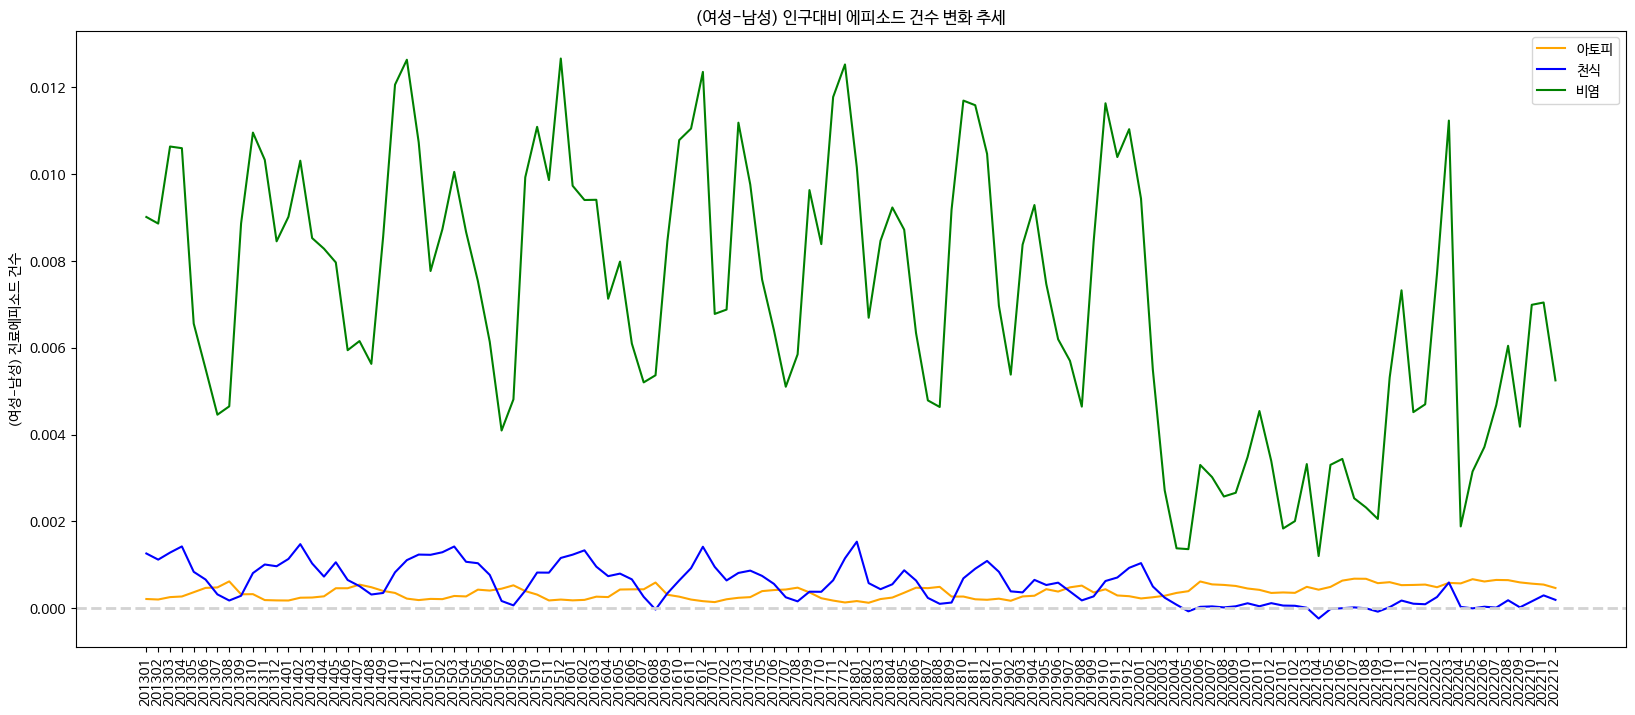

In [69]:
plt.figure(figsize=(20,8))
plt.plot(df5_W.index.astype('str'),(df5_W-df5_M),color="orange",label="아토피")
plt.plot(df5_W.index.astype('str'),(df6_W-df6_M),color="blue",label="천식")
plt.plot(df5_M.index.astype('str'),(df4_W-df4_M),color="green",label="비염")
plt.title('(여성-남성) 인구대비 에피소드 건수 변화 추세')
plt.xticks(rotation=90)
plt.ylabel("(여성-남성) 진료에피소드 건수")
plt.axhline(0.0, 0.0, 1.0, color='lightgray', linestyle='--', linewidth=2)
plt.ticklabel_format(axis='y',useOffset=False,style='plain')
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/마이너스_월")
plt.show()

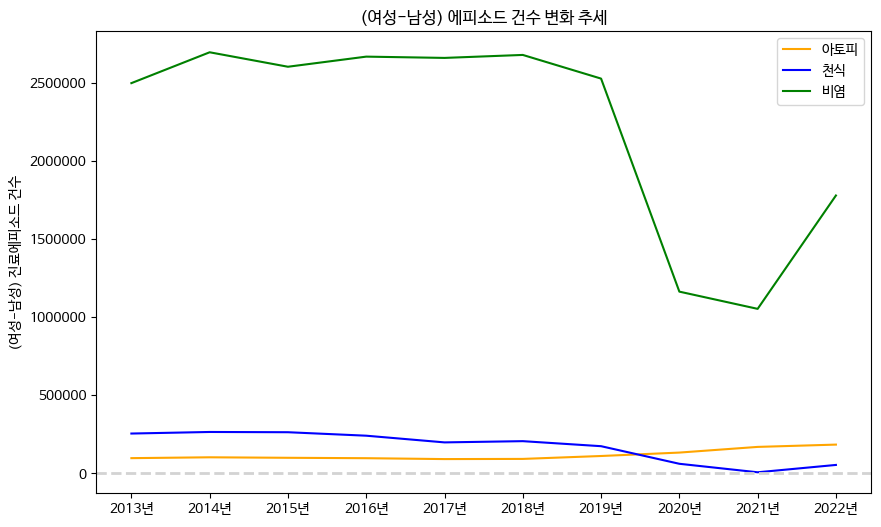

In [70]:
plt.figure(figsize=(10,6))
plt.plot(df2_W_yearly.index.astype('str'),(df2_W_yearly-df2_M_yearly).iloc[:,0],color="orange",label="아토피")
plt.plot(df2_W_yearly.index.astype('str'),(df3_W_yearly-df3_M_yearly),color="blue",label="천식")
plt.plot(df2_M_yearly.index.astype('str'),(df1_W_yearly-df1_M_yearly),color="green",label="비염")
plt.title('(여성-남성) 에피소드 건수 변화 추세')
plt.ylabel("(여성-남성) 진료에피소드 건수")
plt.axhline(0.0, 0.0, 1.0, color='lightgray', linestyle='--', linewidth=2)
plt.ticklabel_format(axis='y',useOffset=False,style='plain')
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/마이너스_년")
plt.show()

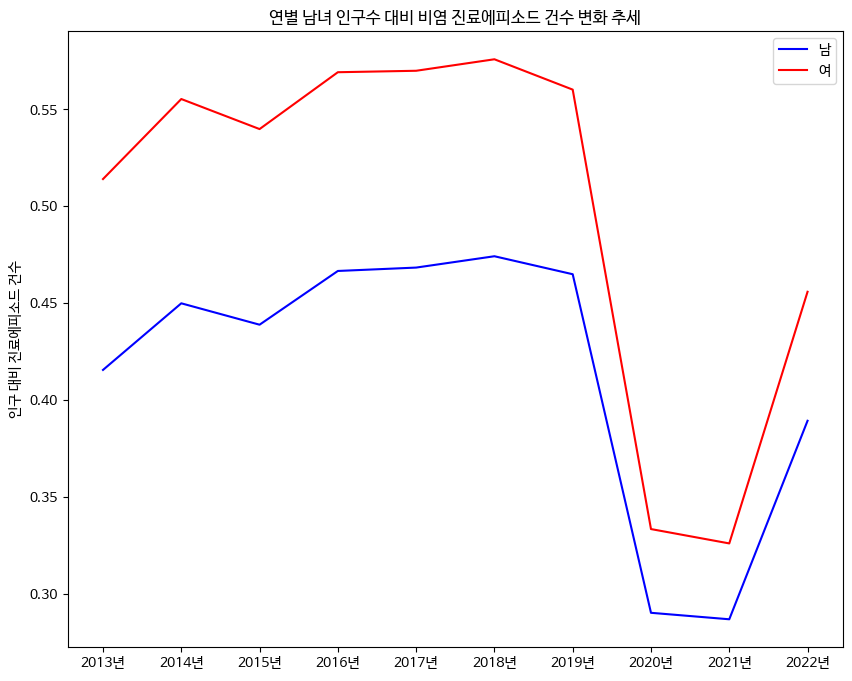

In [71]:
plt.figure(figsize=(10,8))
plt.plot(df4_M_yearly.index.astype('str'),df4_M_yearly.iloc[:].to_list(),color="blue",label="남")
plt.plot(df4_W_yearly.index.astype('str'),df4_W_yearly.iloc[:].to_list(),color="red",label="여")
plt.title("연별 남녀 인구수 대비 비염 진료에피소드 건수 변화 추세")
plt.ylabel("인구 대비 진료에피소드 건수")
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/인구대비_비염_yearly")
plt.show()

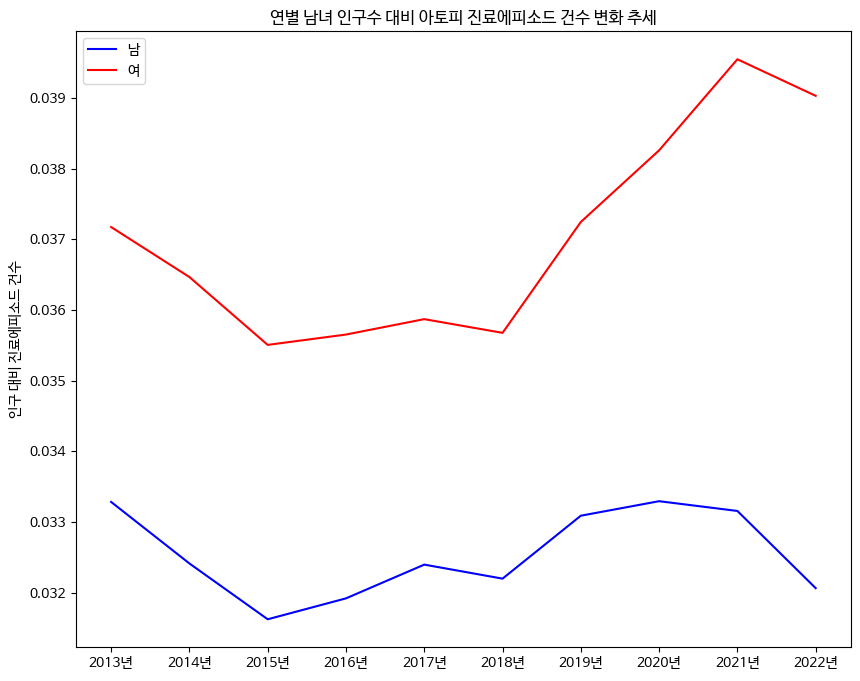

In [72]:
plt.figure(figsize=(10,8))
plt.plot(df5_M_yearly.index.astype('str'),df5_M_yearly.iloc[:].to_list(),color="blue",label="남")
plt.plot(df5_W_yearly.index.astype('str'),df5_W_yearly.iloc[:].to_list(),color="red",label="여")
plt.title("연별 남녀 인구수 대비 아토피 진료에피소드 건수 변화 추세")
plt.ylabel("인구 대비 진료에피소드 건수")
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/인구대비_아토피_yearly")
plt.show()

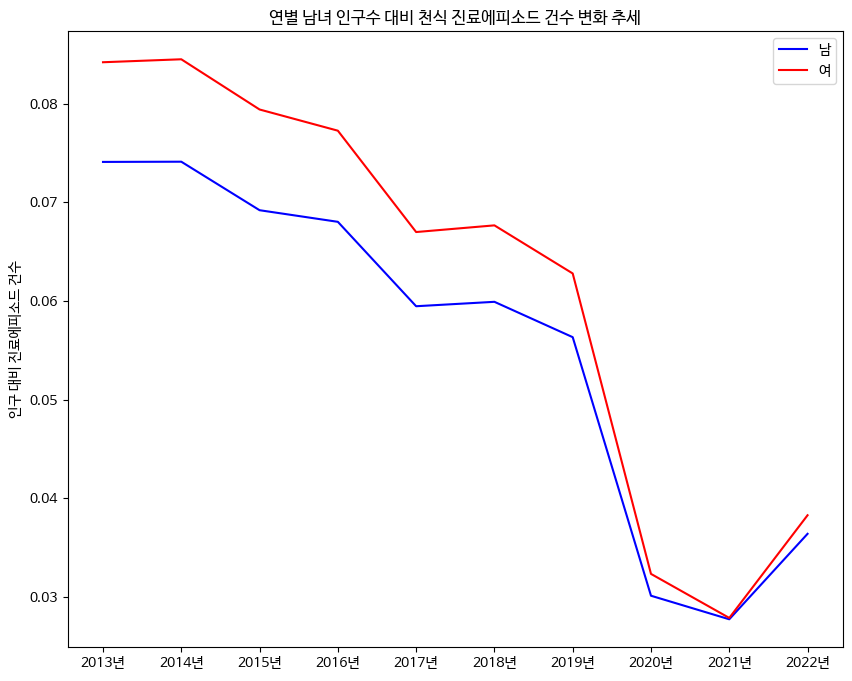

In [73]:
plt.figure(figsize=(10,8))
plt.plot(df6_M_yearly.index.astype('str'),df6_M_yearly.iloc[:].to_list(),color="blue",label="남")
plt.plot(df6_W_yearly.index.astype('str'),df6_W_yearly.iloc[:].to_list(),color="red",label="여")
plt.title("연별 남녀 인구수 대비 천식 진료에피소드 건수 변화 추세")
plt.ylabel("인구 대비 진료에피소드 건수")
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/인구대비_천식_yearly")
plt.show()

In [74]:
DF_M=pd.DataFrame()

DF_M['비염']=df1_M_yearly['진료에피소드 건수']
DF_M['아토피']=df2_M_yearly['진료에피소드 건수']
DF_M['천식']=df3_M_yearly['진료에피소드 건수']

DF_M #10년간 남성 연별 질병 에피소드 건수

,비염,아토피,천식
2013년,10635506,851728,1896352
2014년,11551220,832090,1902907
2015년,11307009,814643,1782736
2016년,12053388,824476,1757106
2017년,12111736,837717,1537612
2018년,12267796,832918,1549795
2019년,12027172,855894,1456952
2020년,7503210,860410,777724
2021년,7389826,853714,713359
2022년,9983386,822093,932605


In [75]:
DF_W=pd.DataFrame()

DF_W['비염']=df1_W_yearly['진료에피소드 건수']
DF_W['아토피']=df2_W_yearly['진료에피소드 건수']
DF_W['천식']=df3_W_yearly['진료에피소드 건수']

DF_W #10년간 여성 연별 질병 에피소드 건수

,비염,아토피,천식
2013년,13136730,949877,2152165
2014년,14250182,935661,2168764
2015년,13913273,915041,2046982
2016년,14724444,922285,1999095
2017년,14774605,929856,1736715
2018년,14949762,926162,1756776
2019년,14557447,967801,1631696
2020년,8668376,994233,839709
2021년,8444614,1023905,720943
2022년,11764612,1007011,987239


In [76]:
DF_A=pd.DataFrame()

DF_A['남']=df1_M_yearly['진료에피소드 건수']
DF_A['여']=df1_W_yearly['진료에피소드 건수']

DF_A #10년간 월별 비염 에피소드 건수

,남,여
2013년,10635506,13136730
2014년,11551220,14250182
2015년,11307009,13913273
2016년,12053388,14724444
2017년,12111736,14774605
2018년,12267796,14949762
2019년,12027172,14557447
2020년,7503210,8668376
2021년,7389826,8444614
2022년,9983386,11764612


In [77]:
DF_B=pd.DataFrame()

DF_B['남']=df2_M_yearly['진료에피소드 건수']
DF_B['여']=df2_W_yearly['진료에피소드 건수']

DF_B #10년간 월별 비염 에피소드 건수

,남,여
2013년,851728,949877
2014년,832090,935661
2015년,814643,915041
2016년,824476,922285
2017년,837717,929856
2018년,832918,926162
2019년,855894,967801
2020년,860410,994233
2021년,853714,1023905
2022년,822093,1007011


In [78]:
DF_C=pd.DataFrame()

DF_C['남']=df3_M_yearly['진료에피소드 건수']
DF_C['여']=df3_W_yearly['진료에피소드 건수']

DF_C #10년간 월별 비염 에피소드 건수

,남,여
2013년,1896352,2152165
2014년,1902907,2168764
2015년,1782736,2046982
2016년,1757106,1999095
2017년,1537612,1736715
2018년,1549795,1756776
2019년,1456952,1631696
2020년,777724,839709
2021년,713359,720943
2022년,932605,987239


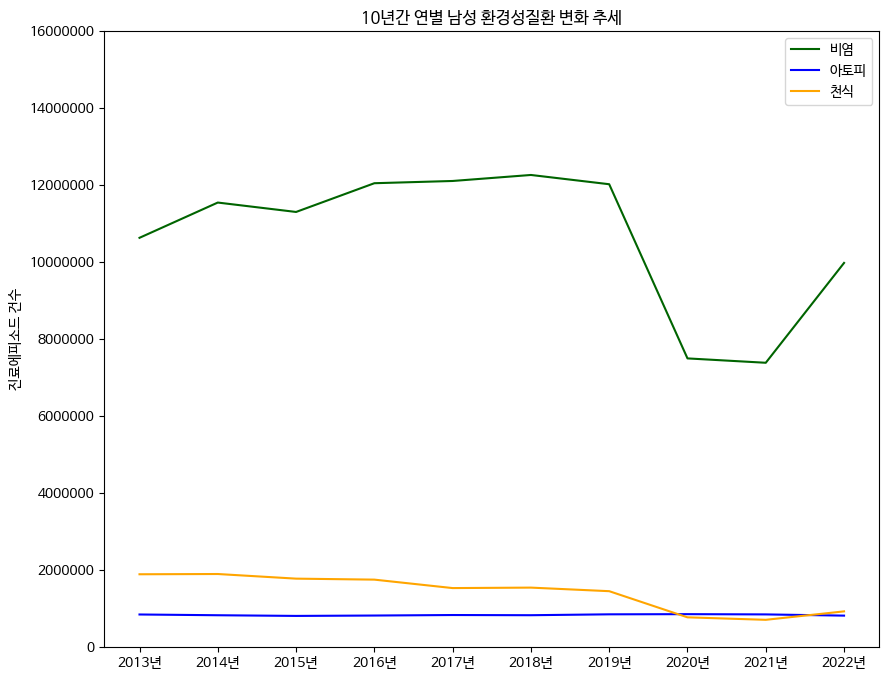

In [79]:
plt.figure(figsize=(10,8))
plt.plot(df3_M_yearly.index.astype('str'),DF_M['비염'],color="darkgreen",label="비염")
plt.plot(df3_M_yearly.index.astype('str'),DF_M['아토피'],color="blue",label="아토피")
plt.plot(df3_M_yearly.index.astype('str'),DF_M['천식'],color="orange",label="천식")
plt.title("10년간 연별 남성 환경성질환 변화 추세")
plt.ylabel("진료에피소드 건수")
plt.ylim(0,16000000)
plt.ticklabel_format(axis='y',useOffset=False,style='plain')
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/남성_yearly")
plt.show()

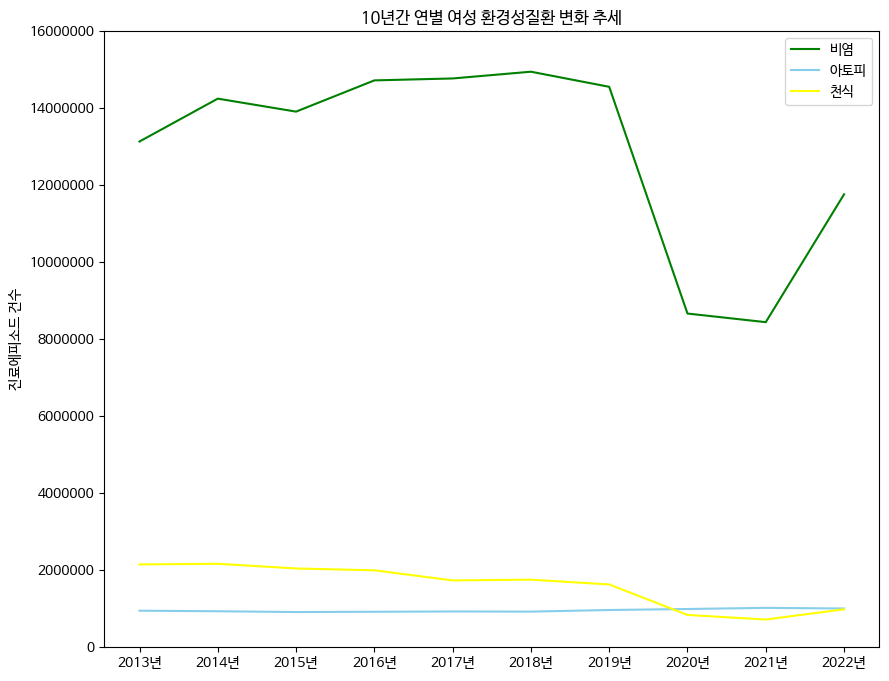

In [80]:
plt.figure(figsize=(10,8))
plt.plot(df3_M_yearly.index.astype('str'),DF_W['비염'],color="green",label="비염")
plt.plot(df3_M_yearly.index.astype('str'),DF_W['아토피'],color="skyblue",label="아토피")
plt.plot(df3_M_yearly.index.astype('str'),DF_W['천식'],color="yellow",label="천식")
plt.title("10년간 연별 여성 환경성질환 변화 추세")
plt.ylabel("진료에피소드 건수")
plt.ylim(0,16000000)
plt.ticklabel_format(axis='y',useOffset=False,style='plain')
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/여성_yearly")
plt.show()

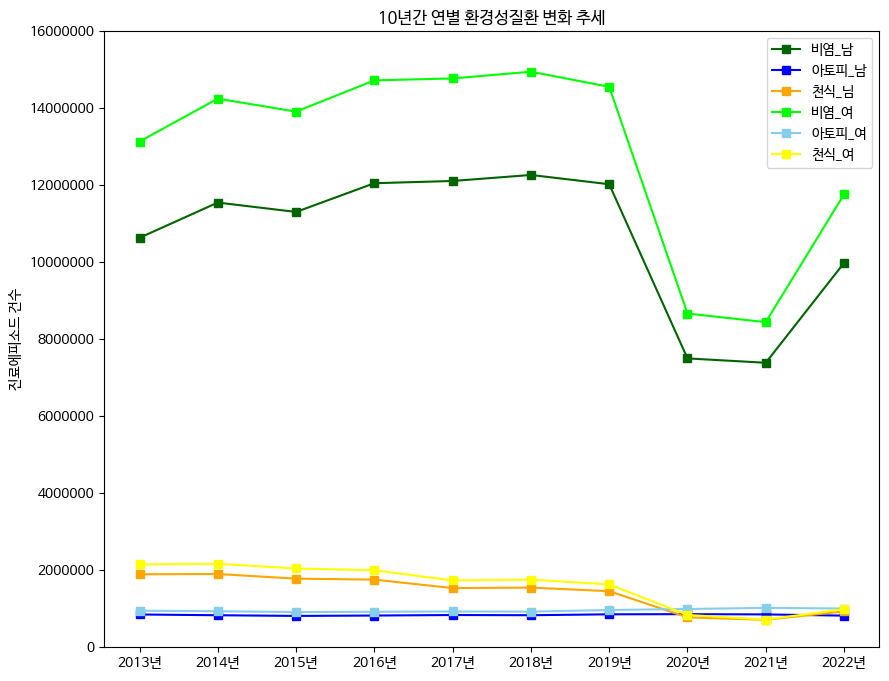

In [81]:
plt.figure(figsize=(10,8))
plt.plot(df3_M_yearly.index.astype('str'),DF_M['비염'],color="darkgreen",label="비염_남",marker='s')
plt.plot(df3_M_yearly.index.astype('str'),DF_M['아토피'],color="blue",label="아토피_남",marker='s')
plt.plot(df3_M_yearly.index.astype('str'),DF_M['천식'],color="orange",label="천식_님",marker='s')
plt.plot(df3_M_yearly.index.astype('str'),DF_W['비염'],color="lime",label="비염_여",marker='s')
plt.plot(df3_M_yearly.index.astype('str'),DF_W['아토피'],color="skyblue",label="아토피_여",marker='s')
plt.plot(df3_M_yearly.index.astype('str'),DF_W['천식'],color="yellow",label="천식_여",marker='s')
plt.title("10년간 연별 환경성질환 변화 추세")
plt.ylabel("진료에피소드 건수")
plt.ylim(0,16000000)
plt.ticklabel_format(axis='y',useOffset=False,style='plain')
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/yearly")
plt.show()

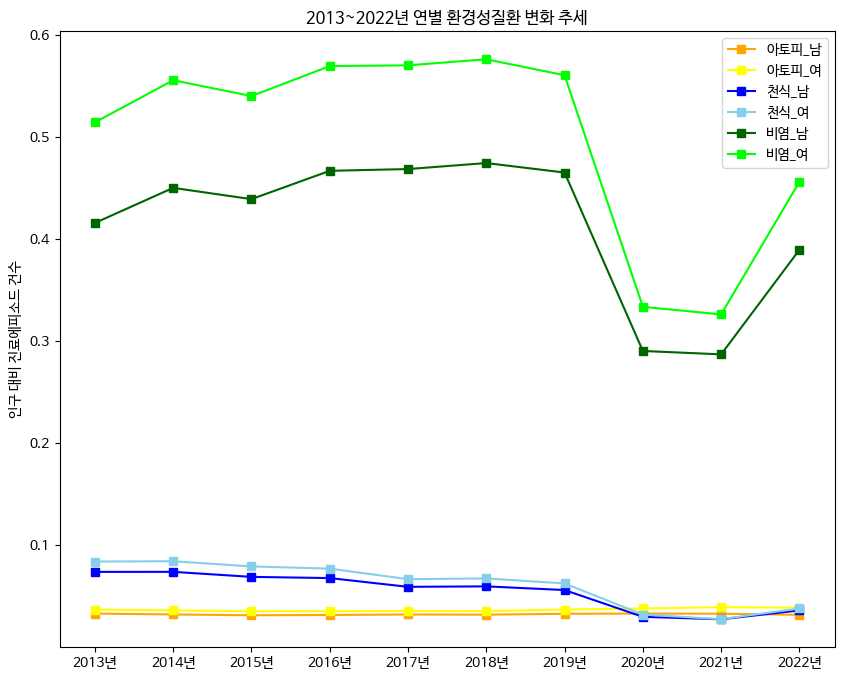

In [82]:
plt.figure(figsize=(10,8))
plt.plot(df6_M_yearly.index.astype('str'),df5_M_yearly.iloc[:].to_list(),color="orange",label="아토피_남",marker='s')
plt.plot(df6_W_yearly.index.astype('str'),df5_W_yearly.iloc[:].to_list(),color="yellow",label="아토피_여",marker='s')
plt.plot(df6_M_yearly.index.astype('str'),df6_M_yearly.iloc[:].to_list(),color="blue",label="천식_남",marker='s')
plt.plot(df6_W_yearly.index.astype('str'),df6_W_yearly.iloc[:].to_list(),color="skyblue",label="천식_여",marker='s')
plt.plot(df6_M_yearly.index.astype('str'),df4_M_yearly.iloc[:].to_list(),color="darkgreen",label="비염_남",marker='s')
plt.plot(df6_W_yearly.index.astype('str'),df4_W_yearly.iloc[:].to_list(),color="lime",label="비염_여",marker='s')
plt.title("2013~2022년 연별 환경성질환 변화 추세")
plt.ylabel("인구 대비 진료에피소드 건수")
plt.ticklabel_format(axis='y',useOffset=False,style='plain')
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/인구대비_yearly")
plt.show()

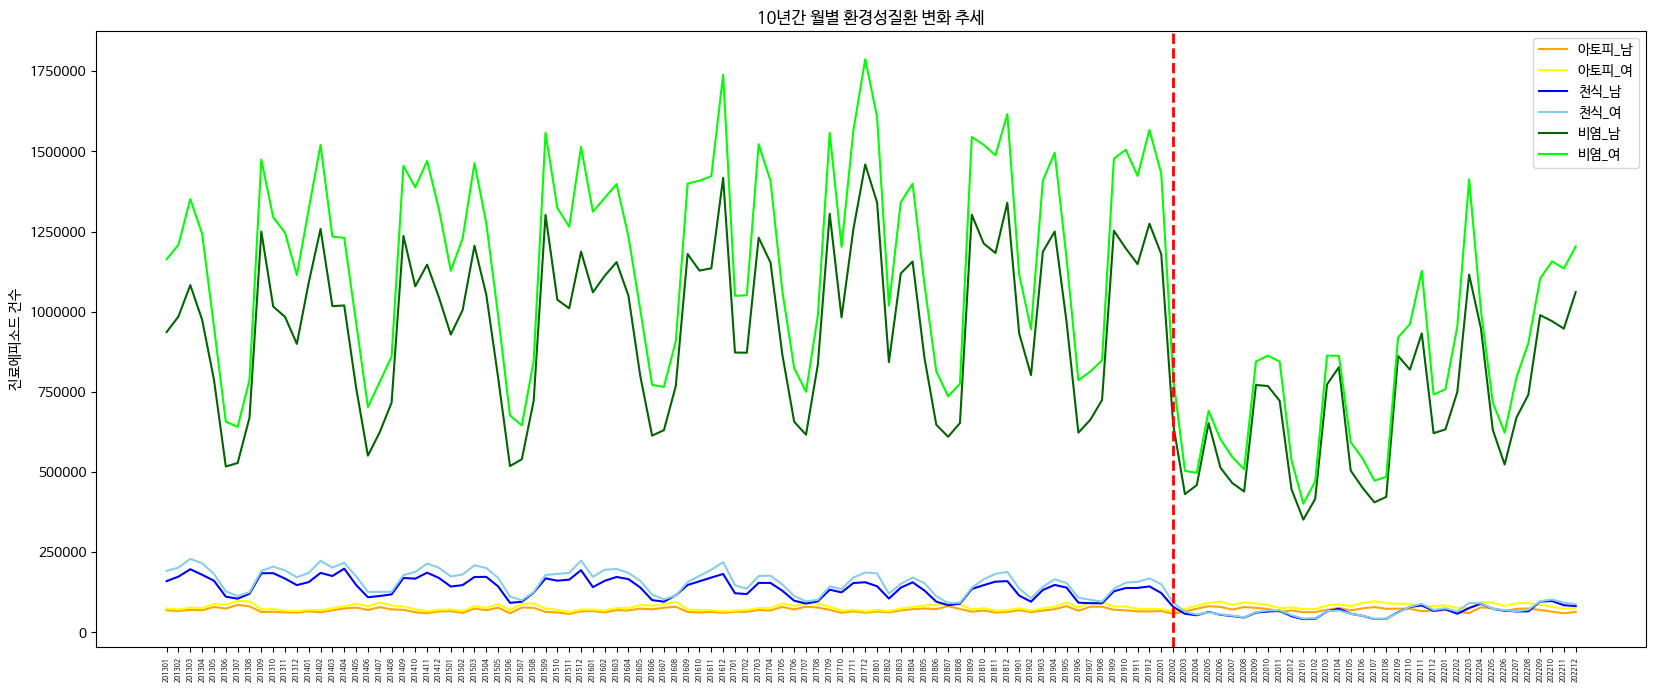

In [83]:
plt.figure(figsize=(20,8))
plt.plot(df3_M.index.astype('str'),df2_M['진료에피소드 건수'],color="orange",label="아토피_남")
plt.plot(df3_M.index.astype('str'),df2_W['진료에피소드 건수'],color="yellow",label="아토피_여")
plt.plot(df3_M.index.astype('str'),df3_M['진료에피소드 건수'],color="blue",label="천식_남")
plt.plot(df3_M.index.astype('str'),df3_W['진료에피소드 건수'],color="skyblue",label="천식_여")
plt.plot(df3_M.index.astype('str'),df1_M['진료에피소드 건수'],color="darkgreen",label="비염_남")
plt.plot(df3_M.index.astype('str'),df1_W['진료에피소드 건수'],color="lime",label="비염_여")
plt.title("10년간 월별 환경성질환 변화 추세")
plt.xticks(rotation=90,fontsize=5)
plt.ylabel("진료에피소드 건수")
plt.axvline(x='202002', color='r', linestyle='--', linewidth=2)
plt.ticklabel_format(axis='y',useOffset=False,style='plain')
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/monthly")
plt.show()

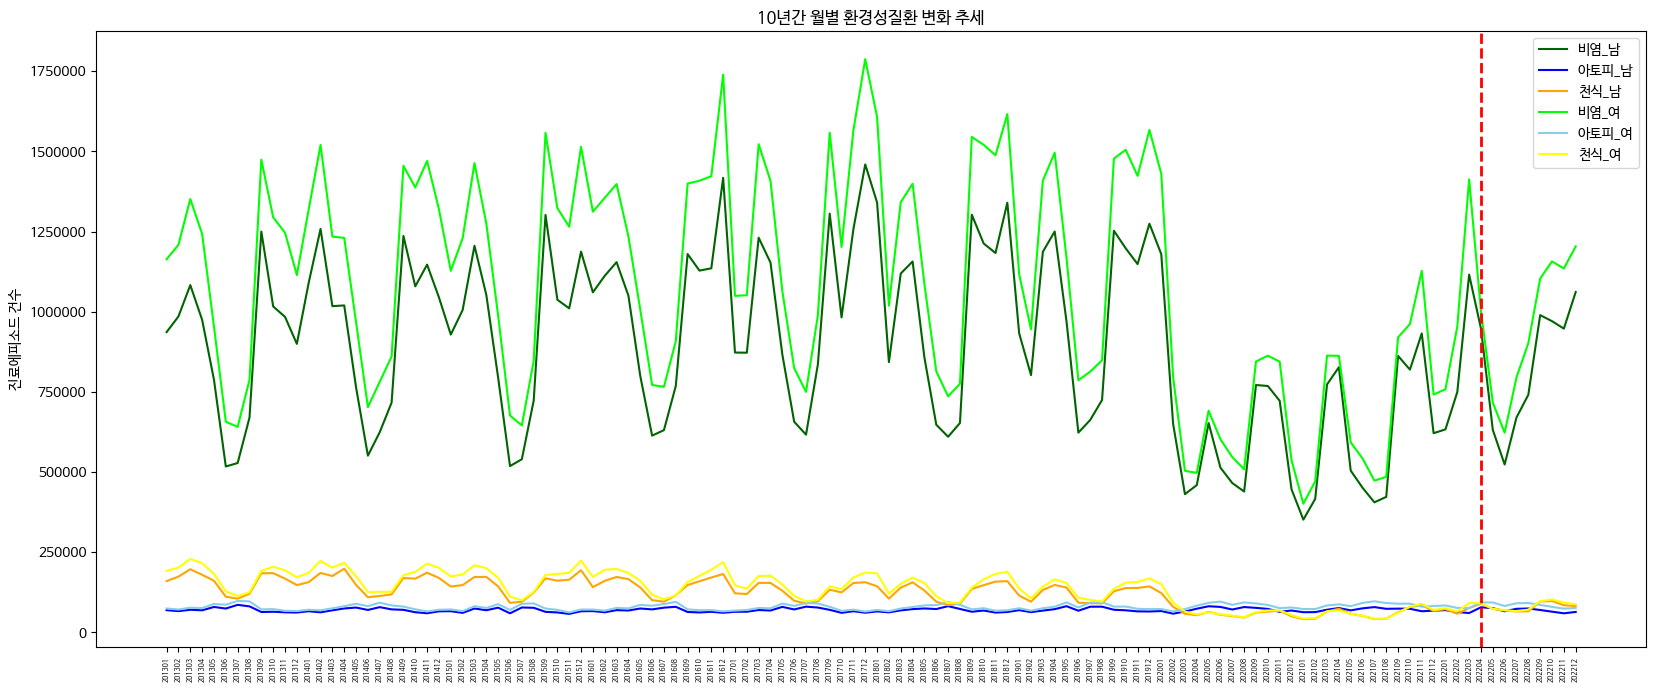

In [84]:
plt.figure(figsize=(20,8))
plt.plot(df3_M.index.astype('str'),df1_M['진료에피소드 건수'],color="darkgreen",label="비염_남")
plt.plot(df3_M.index.astype('str'),df2_M['진료에피소드 건수'],color="blue",label="아토피_남")
plt.plot(df3_M.index.astype('str'),df3_M['진료에피소드 건수'],color="orange",label="천식_남")
plt.plot(df3_M.index.astype('str'),df1_W['진료에피소드 건수'],color="lime",label="비염_여")
plt.plot(df3_M.index.astype('str'),df2_W['진료에피소드 건수'],color="skyblue",label="아토피_여")
plt.plot(df3_M.index.astype('str'),df3_W['진료에피소드 건수'],color="yellow",label="천식_여")
plt.title("10년간 월별 환경성질환 변화 추세")
plt.xticks(rotation=90,fontsize=5)
plt.ylabel("진료에피소드 건수")
plt.axvline(x='202204', color='r', linestyle='--', linewidth=2)
plt.ticklabel_format(axis='y',useOffset=False,style='plain')
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/monthly_선")
plt.show()

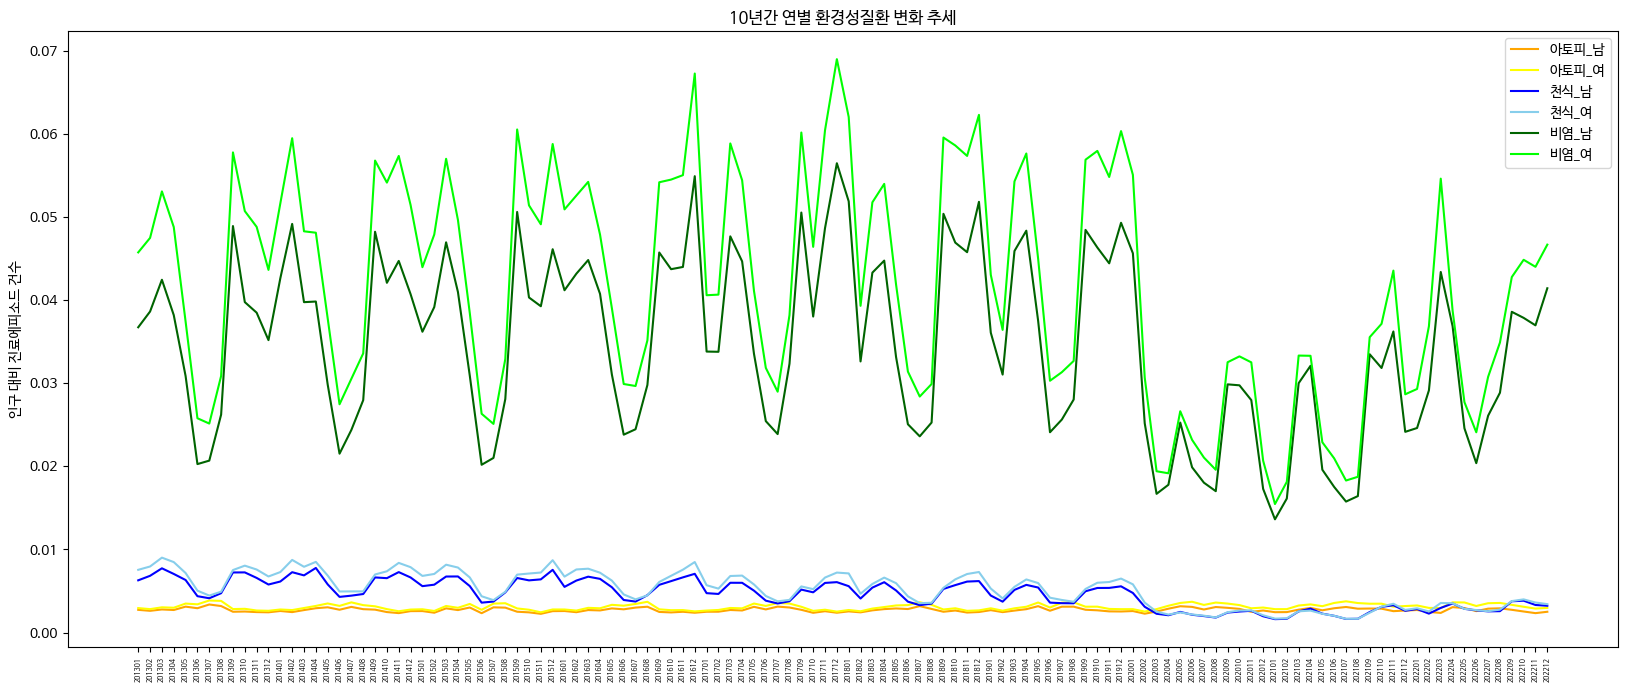

In [85]:
plt.figure(figsize=(20,8))
plt.plot(df5_M.index.astype('str'),df5_M.iloc[:].to_list(),color="orange",label="아토피_남")
plt.plot(df5_W.index.astype('str'),df5_W.iloc[:].to_list(),color="yellow",label="아토피_여")
plt.plot(df6_M.index.astype('str'),df6_M.iloc[:].to_list(),color="blue",label="천식_남")
plt.plot(df6_W.index.astype('str'),df6_W.iloc[:].to_list(),color="skyblue",label="천식_여")
plt.plot(df4_M.index.astype('str'),df4_M.iloc[:].to_list(),color="darkgreen",label="비염_남")
plt.plot(df4_W.index.astype('str'),df4_W.iloc[:].to_list(),color="lime",label="비염_여")
plt.title("10년간 연별 환경성질환 변화 추세")
plt.xticks(rotation=90,fontsize=5)
plt.ylabel("인구 대비 진료에피소드 건수")
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/인구대비_monthly")
plt.show()

성별 의료 이용률

In [90]:
d=pd.read_csv('/content/drive/MyDrive/EDA 2024-1/의료서비스_이용률_성_연령·교육정도·혼인상태별__20240129011836.csv',encoding='cp949')
d

,성별,연령·교육정도·혼인상태별,2014,2014.1,2016,2016.1,2018,2018.1,2020,2020.1,2022,2022.1
0,성별,연령·교육정도·혼인상태별,이용한 적 있다,이용한 적 없다,이용한 적 있다,이용한 적 없다,이용한 적 있다,이용한 적 없다,이용한 적 있다,이용한 적 없다,이용한 적 있다,이용한 적 없다
1,전체,계,77.3,22.7,77.8,22.2,81.0,19.0,79.8,20.2,78.6,21.4
2,여자,계,81.2,18.8,82.3,17.7,84.7,15.3,83.5,16.5,82.1,17.9
3,남자,계,73.2,26.8,73.2,26.8,77.2,22.8,76.0,24.0,75.1,24.9


In [91]:
d_M=d.iloc[[3],[2,4,6,8,10]]
d_M.index=['남성']
d_M=d_M.T
d_M

,남성
2014,73.2
2016,73.2
2018,77.2
2020,76.0
2022,75.1


In [92]:
d_W=d.iloc[[2],[2,4,6,8,10]]
d_W.index=['여성']
d_W=d_W.T
d_W

,여성
2014,81.2
2016,82.3
2018,84.7
2020,83.5
2022,82.1


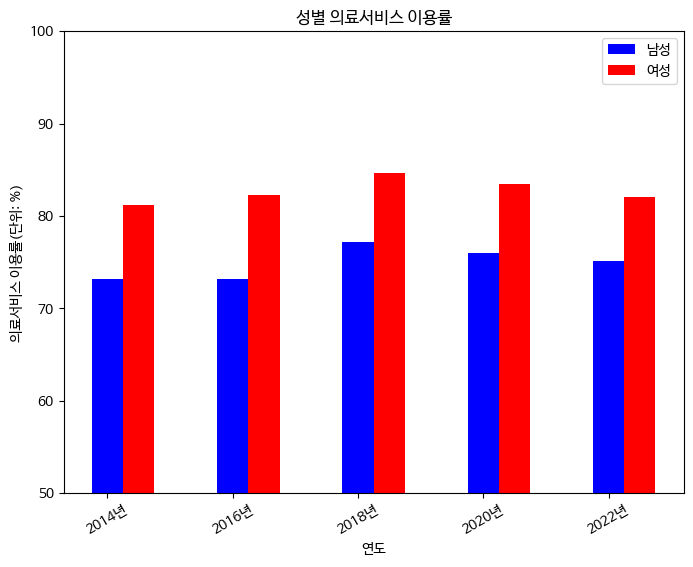

In [93]:
w=0.25
idx=np.arange(5)
idx

plt.figure(figsize=(8,6))
plt.bar(idx,pd.to_numeric(d_M['남성']),w,color='blue',label='남성')
plt.bar(idx+w,pd.to_numeric(d_W['여성']),w,color='red',label='여성')
plt.ylim(0,100)
plt.xticks(idx,['2014년','2016년','2018년','2020년','2022년'], rotation=30)
plt.yticks(range(0,101,10))
plt.title('성별 의료서비스 이용률')
plt.xlabel('연도')
plt.ylabel('의료서비스 이용률(단위: %)')
plt.ylim(50,100)
plt.legend()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/의료서비스 이용률")
plt.show()

성별 진료에피소드 건수 증감률

In [99]:
#2020년 국내 코로나 첫 발생, 신천지대구교회 관련 국내 대규모 유행 발생
#2022년 사회적 거리두기 철폐, 실외 마스크 착용 철폐

In [101]:
df_M=pd.concat([df1_M.iloc[:,0],df2_M.iloc[:,0],df3_M.iloc[:,0]],axis=1)
df_M.columns=['비염','아토피','천식']
df_M #남성 월별 환경성질환 에피소드 건수

,비염,아토피,천식
요양개시연월,,,
201301,936696,69590,160198
201302,985510,66649,174150
201303,1083248,70847,197186
201304,975001,69170,179959
201305,788053,79523,161361
...,...,...,...
202208,741323,74802,66015
202209,989641,70098,96424
202210,970777,64887,98186


In [102]:
M_yearly=pd.concat([df2_M_yearly,df3_M_yearly, df1_M_yearly],axis=1)
M_yearly.columns=['아토피','천식','비염']
W_yearly=pd.concat([df2_W_yearly,df3_W_yearly, df1_W_yearly],axis=1)
W_yearly.columns=['아토피','천식','비염']

In [103]:
def rate(k):
  return k.pct_change()*100

rates_M=M_yearly.apply(rate)
rates_W=W_yearly.apply(rate)

In [104]:
rates_M.dropna()

,아토피,천식,비염
2014년,-2.305666,0.345664,8.609971
2015년,-2.096768,-6.315127,-2.114158
2016년,1.207032,-1.437678,6.601030
2017년,1.605990,-12.491790,0.484080
2018년,-0.572866,0.792333,1.288502
2019년,2.758495,-5.990663,-1.961428
2020년,0.527635,-46.619793,-37.614512
2021년,-0.778234,-8.276072,-1.511140
2022년,-3.703934,30.734315,35.096361


In [105]:
rates_W.dropna()

,아토피,천식,비염
2014년,-1.496615,0.771270,8.475869
2015년,-2.203790,-5.615272,-2.364243
2016년,0.791659,-2.339395,5.830195
2017년,0.820896,-13.124939,0.340665
2018년,-0.397266,1.155112,1.185527
2019년,4.495866,-7.119860,-2.624222
2020년,2.731140,-48.537657,-40.454010
2021년,2.984411,-14.143709,-2.581360
2022년,-1.649958,36.937178,39.314976


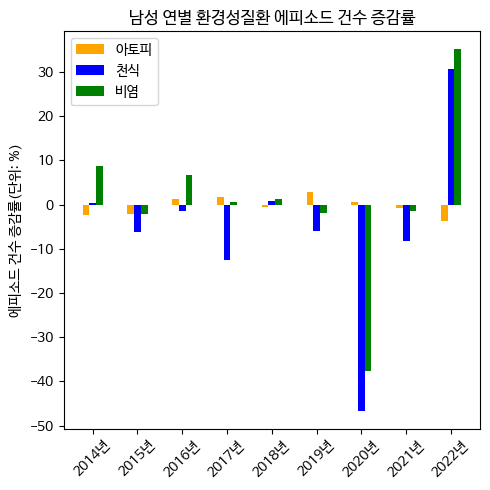

In [106]:
w=0.15
idx=np.arange(9)
idx

plt.figure(figsize=(5,5))
plt.bar(idx-w,rates_M.dropna().iloc[:,0],w,color='orange',label='아토피')
plt.bar(idx,rates_M.dropna().iloc[:,1],w,color='blue',label='천식')
plt.bar(idx+w,rates_M.dropna().iloc[:,2],w,color='green',label='비염')
plt.xticks(idx,rates_M.dropna().index,rotation=45)
plt.title('남성 연별 환경성질환 에피소드 건수 증감률')
plt.ylabel('에피소드 건수 증감률(단위: %)')
plt.legend()
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/증감률_남성")
plt.show()

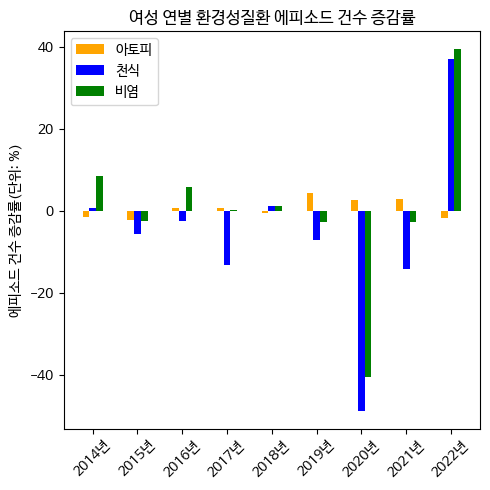

In [107]:
w=0.15
idx=np.arange(9)
idx

plt.figure(figsize=(5,5))
plt.bar(idx-w,rates_W.dropna().iloc[:,0],w,color='orange',label='아토피')
plt.bar(idx,rates_W.dropna().iloc[:,1],w,color='blue',label='천식')
plt.bar(idx+w,rates_W.dropna().iloc[:,2],w,color='green',label='비염')
plt.xticks(idx,rates_M.dropna().index,rotation=45)
plt.title('여성 연별 환경성질환 에피소드 건수 증감률')
plt.ylabel('에피소드 건수 증감률(단위: %)')
plt.legend()
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/EDA 2024-1/증감률_여성")
plt.show()

월별 지역별 이산화질소 대기오염도

In [108]:
NO2=pd.read_csv('/content/drive/MyDrive/EDA 2024-1/이산화질소_월별_도시별_대기오염도_20240121234254.csv')
NO2 #2013~2022년 지역별 이산화질소

,구분(1),구분(2),2013.01,2013.02,2013.03,2013.04,2013.05,2013.06,2013.07,2013.08,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,강원도,도평균,0.0280,0.0230,0.0210,0.0170,0.0150,0.0120,0.0120,0.0120,...,0.012,0.009,0.008,0.007,0.006,0.006,0.006,0.008,0.013,0.015
1,경기도,도평균,0.0420,0.0340,0.0320,0.0280,0.0290,0.0270,0.0170,0.0200,...,0.022,0.017,0.013,0.010,0.010,0.010,0.013,0.018,0.025,0.025
2,경상남도,도평균,0.0260,0.0230,0.0230,0.0180,0.0210,0.0180,0.0110,0.0150,...,0.016,0.013,0.012,0.009,0.010,0.009,0.010,0.012,0.019,0.018
3,경상북도,도평균,0.0220,0.0190,0.0200,0.0170,0.0160,0.0140,0.0120,0.0120,...,0.012,0.009,0.008,0.007,0.007,0.007,0.007,0.009,0.014,0.013
4,광주광역시,광주광역시,0.0280,0.0240,0.0220,0.0200,0.0180,0.0160,0.0100,0.0120,...,0.016,0.013,0.011,0.007,0.006,0.007,0.011,0.014,0.021,0.022
5,대구광역시,대구광역시,0.0340,0.0300,0.0270,0.0220,0.0190,0.0160,0.0120,0.0150,...,0.018,0.013,0.011,0.008,0.008,0.009,0.010,0.014,0.025,0.023
6,대전광역시,대전광역시,0.0360,0.0270,0.0230,0.0190,0.0180,0.0160,0.0100,0.0110,...,0.021,0.016,0.013,0.010,0.010,0.010,0.012,0.017,0.025,0.025
7,부산광역시,부산광역시,0.0270,0.0250,0.0240,0.0200,0.0240,0.0210,0.0170,0.0190,...,0.018,0.016,0.015,0.010,0.012,0.011,0.010,0.013,0.019,0.017
8,서울특별시,서울특별시,0.0450,0.0380,0.0370,0.0340,0.0350,0.0300,0.0220,0.0240,...,0.026,0.020,0.015,0.013,0.014,0.013,0.016,0.020,0.028,0.028
9,세종특별자치시,세종특별자치시,-,-,-,-,-,-,-,-,...,0.018,0.015,0.011,0.009,0.009,0.009,0.012,0.016,0.023,0.021


In [110]:
NO2=NO2.drop(['구분(2)'],axis=1)

In [111]:
NO2=NO2.T
NO2=NO2[1:]
NO2.columns=['강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북']
NO2

,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
2013.01,0.0280,0.0420,0.0260,0.0220,0.0280,0.0340,0.0360,0.0270,0.0450,-,0.0290,0.0360,0.0190,0.0260,0.0130,0.0240,0.0370
2013.02,0.0230,0.0340,0.0230,0.0190,0.0240,0.0300,0.0270,0.0250,0.0380,-,0.0260,0.0290,0.0180,0.0200,0.0130,0.0190,0.0280
2013.03,0.0210,0.0320,0.0230,0.0200,0.0220,0.0270,0.0230,0.0240,0.0370,-,0.0270,0.0290,0.0170,0.0180,0.0120,0.0180,0.0270
2013.04,0.0170,0.0280,0.0180,0.0170,0.0200,0.0220,0.0190,0.0200,0.0340,-,0.0230,0.0280,0.0150,0.0160,0.0100,0.0170,0.0230
2013.05,0.0150,0.0290,0.0210,0.0160,0.0180,0.0190,0.0180,0.0240,0.0350,-,0.0270,0.0300,0.0150,0.0140,0.0110,0.0170,0.0220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022.08,0.006,0.01,0.009,0.007,0.007,0.009,0.01,0.011,0.013,0.009,0.013,0.011,0.005,0.005,0.005,0.006,0.007
2022.09,0.006,0.013,0.01,0.007,0.011,0.01,0.012,0.01,0.016,0.012,0.012,0.015,0.006,0.007,0.006,0.009,0.009
2022.10,0.008,0.018,0.012,0.009,0.014,0.014,0.017,0.013,0.02,0.016,0.014,0.019,0.008,0.01,0.006,0.012,0.012
2022.11,0.013,0.025,0.019,0.014,0.021,0.025,0.025,0.019,0.028,0.023,0.02,0.026,0.013,0.014,0.008,0.016,0.018


In [112]:
NO2_1=NO2.iloc[:,[0]] #강원
NO2_2=NO2.iloc[:,[1]] #경기
NO2_3=NO2.iloc[:,[2]] #경남
NO2_4=NO2.iloc[:,[3]] #경북
NO2_5=NO2.iloc[:,[4]] #광주
NO2_6=NO2.iloc[:,[5]] #대구
NO2_7=NO2.iloc[:,[6]] #대전
NO2_8=NO2.iloc[:,[7]] #부산
NO2_9=NO2.iloc[:,[8]] #서울
NO2_10=NO2.iloc[:,[9]] #세종
NO2_11=NO2.iloc[:,[10]] #울산
NO2_12=NO2.iloc[:,[11]] #인천
NO2_13=NO2.iloc[:,[12]] #전남
NO2_14=NO2.iloc[:,[13]] #전북
NO2_15=NO2.iloc[:,[14]] #제주
NO2_16=NO2.iloc[:,[15]] #충남
NO2_17=NO2.iloc[:,[16]] #충북

In [114]:
DF=pd.concat([NO2_1,NO2_2,NO2_3,NO2_4,NO2_5,NO2_6,NO2_7,NO2_8,NO2_9,NO2_10,NO2_11,NO2_12,NO2_13,NO2_14,NO2_15,NO2_16,NO2_17])
DF.to_csv('/content/drive/MyDrive/EDA 2024-1/이산화질소 대기오염도(ppm).csv',encoding='cp949')